# I have been assigned the Airbnb Listings Capstone Project, which involves analyzing Airbnb data for two countries: France and Germany. The project consists of two primary datasets, one for each country, containing various attributes related to property listings, hosts, pricing, amenities, and user reviews.

# The goal of this capstone project is to perform exploratory data analysis (EDA), derive meaningful business insights, and ultimately build predictive models to support decision-making. This includes identifying patterns in listing types, pricing strategies, customer behavior, and regional trends within each country.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Load the datasets and do the cleaning of the dataset.

### Reading the France dataset and displaying the top 5 rows.

In [5]:
df_france = pd.read_csv("France.csv")
df_france.head()

ID   Host ID Host Name  Host Since  Host Response Rate  \
0   6165738  31986651   Bernard     42120.0               100.0   
1  13908935  82489826     Enice     42559.0               100.0   
2   7713011  32492446   Vincent     42127.0               100.0   
3   3335054   2726446   Pascale     41084.0                 NaN   
4  10066518  30432969       Lea     42095.0                95.0   

   Host Listings Count  Host Total Listings Count      City  \
0                  1.0                        1.0    Thoiry   
1                  1.0                        1.0  Gaillard   
2                  7.0                        7.0     Paris   
3                  1.0                        1.0     Paris   
4                  2.0                        2.0     Paris   

                  State Zipcode  ... Security Deposit Cleaning Fee  \
0           Rhône-Alpes    1710  ...              NaN          NaN   
1  Auvergne Rhône-Alpes   74240  ...            560.0         28.0   
2         Île-de-France   75018  ...            100.0         30.0   
3         Île-de-France   75018  ...            150.0         15.0   
4         Île-de-France   75018  ...              NaN         15.0   

  Guests Included  Extra People  Minimum Nights  Maximum Nights  \
0               1             0               1            1125   
1               1             6               2              30   
2               1             5               4             365   
3               1             0               3            1125   
4               1             0               2            1125   

   Number of Reviews Review Scores Rating Cancellation Policy  \
0                  0                  NaN            flexible   
1                  1                 80.0            moderate   
2                 37                 85.0              strict   
3                  1                100.0            moderate   
4                 13                 97.0            moderate   

   Reviews per Month  
0                NaN  
1               1.00  
2               1.84  
3               0.03  
4               0.89  

[5 rows x 32 columns]

### Checking for the structure and null values in the France dataset.

In [7]:
print(df_france.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56562 entries, 0 to 56561
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         56562 non-null  int64  
 1   Host ID                    56562 non-null  int64  
 2   Host Name                  56551 non-null  object 
 3   Host Since                 56551 non-null  float64
 4   Host Response Rate         37832 non-null  float64
 5   Host Listings Count        56551 non-null  float64
 6   Host Total Listings Count  56551 non-null  float64
 7   City                       56532 non-null  object 
 8   State                      56489 non-null  object 
 9   Zipcode                    55821 non-null  object 
 10  Country                    56562 non-null  object 
 11  Property Type              56562 non-null  object 
 12  Room Type                  56562 non-null  object 
 13  Accommodates               56562 non-null  int

- checking for the null values

In [9]:
df_france.isnull().sum()

ID                               0
Host ID                          0
Host Name                       11
Host Since                      11
Host Response Rate           18730
Host Listings Count             11
Host Total Listings Count       11
City                            30
State                           73
Zipcode                        741
Country                          0
Property Type                    0
Room Type                        0
Accommodates                     0
Bathrooms                      184
Bedrooms                       134
Beds                            75
Bed Type                         0
Amenities                      428
Price                           57
Weekly Price                 40234
Monthly Price                44214
Security Deposit             25435
Cleaning Fee                 20762
Guests Included                  0
Extra People                     0
Minimum Nights                   0
Maximum Nights                   0
Number of Reviews   

- As we can see that the some of the columns have less than 1000 null values out of 56000 (approx) rows, which is equivalent to 1.8% of the total dataset. So we can just remove them as they will not affect the analysis and outcome.

In [11]:
df_france.shape

(56562, 32)

### Reading the Germany dataset and displaying the top 5 rows.

In [13]:
df_germany = pd.read_csv("Germany.csv")
df_germany.head()

ID   Host ID   Host Name  Host Since  Host Response Rate  \
0  12977541   1111545       Maike  05-09-2011               100.0   
1  13394132  76188462       Guido  06-06-2016               100.0   
2  13983810   7987224      Melina  06-08-2013                 NaN   
3  14893613  81474370  Anne-Liesa  03-07-2016               100.0   
4  12015578  21252930        Asta  12-09-2014                 NaN   

   Host Listings Count  Host Total Listings Count    City   State  Zipcode  \
0                    2                          2  Berlin  Berlin  13355.0   
1                    1                          1  Berlin  Berlin  12247.0   
2                    1                          1  Berlin  Berlin  10827.0   
3                    1                          1  Berlin  Berlin  10585.0   
4                    1                          1  Berlin  Berlin  10437.0   

   ... Security Deposit Cleaning Fee Guests Included  Extra People  \
0  ...              NaN          8.0               1            18   
1  ...            200.0         29.0               2             9   
2  ...            200.0          5.0               2            15   
3  ...              NaN          5.0               1            25   
4  ...            100.0         12.0               2             0   

   Minimum Nights  Maximum Nights  Number of Reviews Review Scores Rating  \
0               2               7                 45                 90.0   
1               1              60                  7                 91.0   
2               2              30                  2                100.0   
3               1               8                 12                100.0   
4               3            1125                  1                100.0   

  Cancellation Policy  Reviews per Month  
0              strict               4.02  
1            moderate               0.89  
2            flexible               0.24  
3            moderate               1.65  
4            flexible               0.10  

[5 rows x 32 columns]

### Checking for the structure and null values in the Germany dataset.

In [15]:
print(df_germany.shape)

(604, 32)


In [16]:
print(df_germany.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         604 non-null    int64  
 1   Host ID                    604 non-null    int64  
 2   Host Name                  604 non-null    object 
 3   Host Since                 604 non-null    object 
 4   Host Response Rate         392 non-null    float64
 5   Host Listings Count        604 non-null    int64  
 6   Host Total Listings Count  604 non-null    int64  
 7   City                       604 non-null    object 
 8   State                      604 non-null    object 
 9   Zipcode                    579 non-null    float64
 10  Country                    604 non-null    object 
 11  Property Type              604 non-null    object 
 12  Room Type                  604 non-null    object 
 13  Accommodates               604 non-null    int64  

- Converting the object datatype of the "Host Since" column to datetime format and then converting it into the float datatype in order to get the number of days.

In [18]:
# Converting "Host Since" to datetime from string format 
df_germany["Host Since"] = pd.to_datetime(df_germany["Host Since"],format="%d-%m-%Y",errors="coerce")

# Converting datetime format to float (number of days since 1899-12-30)
origin = pd.to_datetime('1899-12-30')
df_germany['Host Since'] = (df_germany['Host Since'] - origin).dt.days.astype(float)

# printing the "Host since" top 5 values to check for the changes made.
print(df_germany["Host Since"].head())


0    40791.0
1    42527.0
2    41492.0
3    42554.0
4    41894.0
Name: Host Since, dtype: float64


In [19]:
print(df_germany.isnull().sum())

ID                             0
Host ID                        0
Host Name                      0
Host Since                     0
Host Response Rate           212
Host Listings Count            0
Host Total Listings Count      0
City                           0
State                          0
Zipcode                       25
Country                        0
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       2
Beds                           1
Bed Type                       0
Amenities                      5
Price                          0
Weekly Price                 488
Monthly Price                518
Security Deposit             409
Cleaning Fee                 262
Guests Included                0
Extra People                   0
Minimum Nights                 0
Maximum Nights                 0
Number of Reviews              0
Review Scores Rating         175
Cancellati

### Dropping the null values from the Zipcode, Bedrooms, Beds, Amenities column as they are having very negligible null values.

In [21]:
rows_to_drop_germany = ["Zipcode","Bedrooms","Beds"]
df_germany = df_germany.dropna(subset=rows_to_drop_germany, axis=0)

- Checking for the null values again to check if the null values have been removed from the particular columns

In [23]:
df_germany.isnull().sum()

ID                             0
Host ID                        0
Host Name                      0
Host Since                     0
Host Response Rate           205
Host Listings Count            0
Host Total Listings Count      0
City                           0
State                          0
Zipcode                        0
Country                        0
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Amenities                      5
Price                          0
Weekly Price                 467
Monthly Price                495
Security Deposit             391
Cleaning Fee                 252
Guests Included                0
Extra People                   0
Minimum Nights                 0
Maximum Nights                 0
Number of Reviews              0
Review Scores Rating         167
Cancellati

### Dropping the null values from the respective columns in the France dataset where the number of null values are less than 1000.

In [25]:
rows_to_drop = ["City","State","Zipcode","Bathrooms","Bedrooms","Beds","Amenities","Price","Host Listings Count","Host Total Listings Count","Host Name","Host Since"]
df_france= df_france.dropna(subset=rows_to_drop, axis=0)


In [26]:
# Checking for the shape of the df_france after dropping the null values from the respective columns
print("The number of rows in france df : ", df_france.shape[0])

The number of rows in france df :  54968


In [27]:
# Checking for the shape of the df_germany after dropping the null values from the respective columns.
print("The number of rows in germany df : ", df_germany.shape[0])

The number of rows in germany df :  578


- Checking for the null values again to check if the null values have been removed from the particular columns

In [29]:
df_france.isnull().sum()

ID                               0
Host ID                          0
Host Name                        0
Host Since                       0
Host Response Rate           18081
Host Listings Count              0
Host Total Listings Count        0
City                             0
State                            0
Zipcode                          0
Country                          0
Property Type                    0
Room Type                        0
Accommodates                     0
Bathrooms                        0
Bedrooms                         0
Beds                             0
Bed Type                         0
Amenities                        0
Price                            0
Weekly Price                 39017
Monthly Price                42909
Security Deposit             24486
Cleaning Fee                 19970
Guests Included                  0
Extra People                     0
Minimum Nights                   0
Maximum Nights                   0
Number of Reviews   

In [30]:
df_capstone_project = pd.concat([df_france,df_germany], ignore_index=True)

In [31]:
# Checking for the number of rows in concaneted df.
df_capstone_project.shape

(55546, 32)

- We will have to convert the column names in the lower case as well as use the underscore(_) between the column names so that it will be easy to read the column names and use it in the MySQL Workbench.

In [33]:
# Columns to be renamed and in the lower case also.
col_to_rename = [
    "Host ID", "ID", "Host Name", "Host Since", "Host Response Rate", "Host Listings Count", "Host Total Listings Count",
    "City", "State", "Zipcode", "Country", "Property Type", "Room Type", "Bed Type","Price",
    "Weekly Price", "Monthly Price", "Security Deposit", "Cleaning Fee", "Bedrooms", "Bathrooms", "Beds",
    "Accommodates", "Guests Included", "Extra People", "Minimum Nights", "Maximum Nights",
    "Number of Reviews", "Review Scores Rating", "Cancellation Policy", "Reviews per Month", "Amenities"
]

# Step 2: Converting into lowercase and also adding an underscore.
rename_columns = {col: col.strip().lower().replace(" ", "_") for col in col_to_rename}

# Step 3: Applying renaming to df_merged
df_capstone_project.rename(columns=rename_columns, inplace=True)

# Step 4: Checking for the changes.
print(df_capstone_project.columns)


Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_rate',
       'host_listings_count', 'host_total_listings_count', 'city', 'state',
       'zipcode', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')


In [34]:
df_capstone_project.head()

id   host_id host_name  host_since  host_response_rate  \
0   6165738  31986651   Bernard     42120.0               100.0   
1  13908935  82489826     Enice     42559.0               100.0   
2   7713011  32492446   Vincent     42127.0               100.0   
3   3335054   2726446   Pascale     41084.0                 NaN   
4  10066518  30432969       Lea     42095.0                95.0   

   host_listings_count  host_total_listings_count      city  \
0                  1.0                        1.0    Thoiry   
1                  1.0                        1.0  Gaillard   
2                  7.0                        7.0     Paris   
3                  1.0                        1.0     Paris   
4                  2.0                        2.0     Paris   

                  state zipcode  ... security_deposit cleaning_fee  \
0           Rhône-Alpes    1710  ...              NaN          NaN   
1  Auvergne Rhône-Alpes   74240  ...            560.0         28.0   
2         Île-de-France   75018  ...            100.0         30.0   
3         Île-de-France   75018  ...            150.0         15.0   
4         Île-de-France   75018  ...              NaN         15.0   

  guests_included  extra_people  minimum_nights  maximum_nights  \
0               1             0               1            1125   
1               1             6               2              30   
2               1             5               4             365   
3               1             0               3            1125   
4               1             0               2            1125   

   number_of_reviews review_scores_rating cancellation_policy  \
0                  0                  NaN            flexible   
1                  1                 80.0            moderate   
2                 37                 85.0              strict   
3                  1                100.0            moderate   
4                 13                 97.0            moderate   

   reviews_per_month  
0                NaN  
1               1.00  
2               1.84  
3               0.03  
4               0.89  

[5 rows x 32 columns]

### There are columns named as "host_listings_count" and "host_total_listings_count" and both of them are having the same values.Therefore, we will be dropping host_listings_count column.

In [36]:
df_capstone_project.drop(columns="host_listings_count",inplace=True)

### Since in the amenities column we have a huge number of amenities and also there are commas,hash,semicolon, etc. So we have to remove those and segregate the amenities into number of counts and also creating another column named as "Amenities level" into high,medium and low.

In [38]:
df_capstone_project['amenities'].apply(type).value_counts()


amenities
<class 'str'>      55541
<class 'float'>        5
Name: count, dtype: int64

In [39]:
import pandas as pd
import re

# Step 1: Clean and split the 'amenities' column
def clean_amenities(raw_text):
    if pd.isnull(raw_text):
        return []
    text = re.sub(r"[\[\]\"']", "", raw_text)
    text = re.sub(r"translation missing:.*?(,|$)", "", text)
    text = re.sub(r"\s+", " ", text)
    items = re.split(r",|/|:|-", text)
    return [item.strip() for item in items if item.strip()]

df_capstone_project['amenities'] = df_capstone_project['amenities'].apply(clean_amenities)

# Step 2: Create amenities_count and amenity_level
df_capstone_project['amenities_count'] = df_capstone_project['amenities'].apply(len).astype(float)

def categorize_amenities(count):
    if count >= 15:
        return 'High'
    elif count >= 8:
        return 'Medium'
    else:
        return 'Low'

df_capstone_project['amenities_level'] = pd.Categorical(
    df_capstone_project['amenities_count'].apply(categorize_amenities),
    categories=['Low', 'Medium', 'High'],
    ordered=True
)

# Step 3: Reordering the columns - insert new columns before 'price'
# Drop the original 'amenities' column
df_capstone_project.drop(columns='amenities', inplace=True)

# Get index of 'price' column
price_index = df_capstone_project.columns.get_loc('price')

# Inserting the new columns before 'price'
cols_before = df_capstone_project.columns[:price_index]
cols_after = df_capstone_project.columns[price_index:]
new_column_order = list(cols_before) + ['amenities_count', 'amenities_level'] + list(cols_after)

# Apply new column order
df_capstone_project = df_capstone_project[new_column_order]

# Printing the top 10 records.
print(df_capstone_project.head())


         id   host_id host_name  host_since  host_response_rate  \
0   6165738  31986651   Bernard     42120.0               100.0   
1  13908935  82489826     Enice     42559.0               100.0   
2   7713011  32492446   Vincent     42127.0               100.0   
3   3335054   2726446   Pascale     41084.0                 NaN   
4  10066518  30432969       Lea     42095.0                95.0   

   host_total_listings_count      city                 state zipcode country  \
0                        1.0    Thoiry           Rhône-Alpes    1710  France   
1                        1.0  Gaillard  Auvergne Rhône-Alpes   74240  France   
2                        7.0     Paris         Île-de-France   75018  France   
3                        1.0     Paris         Île-de-France   75018  France   
4                        2.0     Paris         Île-de-France   75018  France   

   ... guests_included extra_people  minimum_nights  maximum_nights  \
0  ...               1            0          

In [40]:
df_capstone_project.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_rate',
       'host_total_listings_count', 'city', 'state', 'zipcode', 'country',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities_count', 'amenities_level', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month', 'amenities_count', 'amenities_level'],
      dtype='object')

In [41]:
# Dropping the last two columns as they have added twice.
# Drop duplicate columns by keeping the first occurrence only
df_capstone_project = df_capstone_project.loc[:, ~df_capstone_project.columns.duplicated()]


In [42]:
df_capstone_project.head()

id   host_id host_name  host_since  host_response_rate  \
0   6165738  31986651   Bernard     42120.0               100.0   
1  13908935  82489826     Enice     42559.0               100.0   
2   7713011  32492446   Vincent     42127.0               100.0   
3   3335054   2726446   Pascale     41084.0                 NaN   
4  10066518  30432969       Lea     42095.0                95.0   

   host_total_listings_count      city                 state zipcode country  \
0                        1.0    Thoiry           Rhône-Alpes    1710  France   
1                        1.0  Gaillard  Auvergne Rhône-Alpes   74240  France   
2                        7.0     Paris         Île-de-France   75018  France   
3                        1.0     Paris         Île-de-France   75018  France   
4                        2.0     Paris         Île-de-France   75018  France   

   ... security_deposit cleaning_fee  guests_included  extra_people  \
0  ...              NaN          NaN                1             0   
1  ...            560.0         28.0                1             6   
2  ...            100.0         30.0                1             5   
3  ...            150.0         15.0                1             0   
4  ...              NaN         15.0                1             0   

   minimum_nights  maximum_nights number_of_reviews  review_scores_rating  \
0               1            1125                 0                   NaN   
1               2              30                 1                  80.0   
2               4             365                37                  85.0   
3               3            1125                 1                 100.0   
4               2            1125                13                  97.0   

  cancellation_policy  reviews_per_month  
0            flexible                NaN  
1            moderate               1.00  
2              strict               1.84  
3            moderate               0.03  
4            moderate               0.89  

[5 rows x 32 columns]

In [43]:
df_capstone_project.isnull().sum()

id                               0
host_id                          0
host_name                        0
host_since                       0
host_response_rate           18286
host_total_listings_count        0
city                             0
state                            0
zipcode                          0
country                          0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
amenities_count                  0
amenities_level                  0
price                            0
weekly_price                 39484
monthly_price                43404
security_deposit             24877
cleaning_fee                 20222
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews   

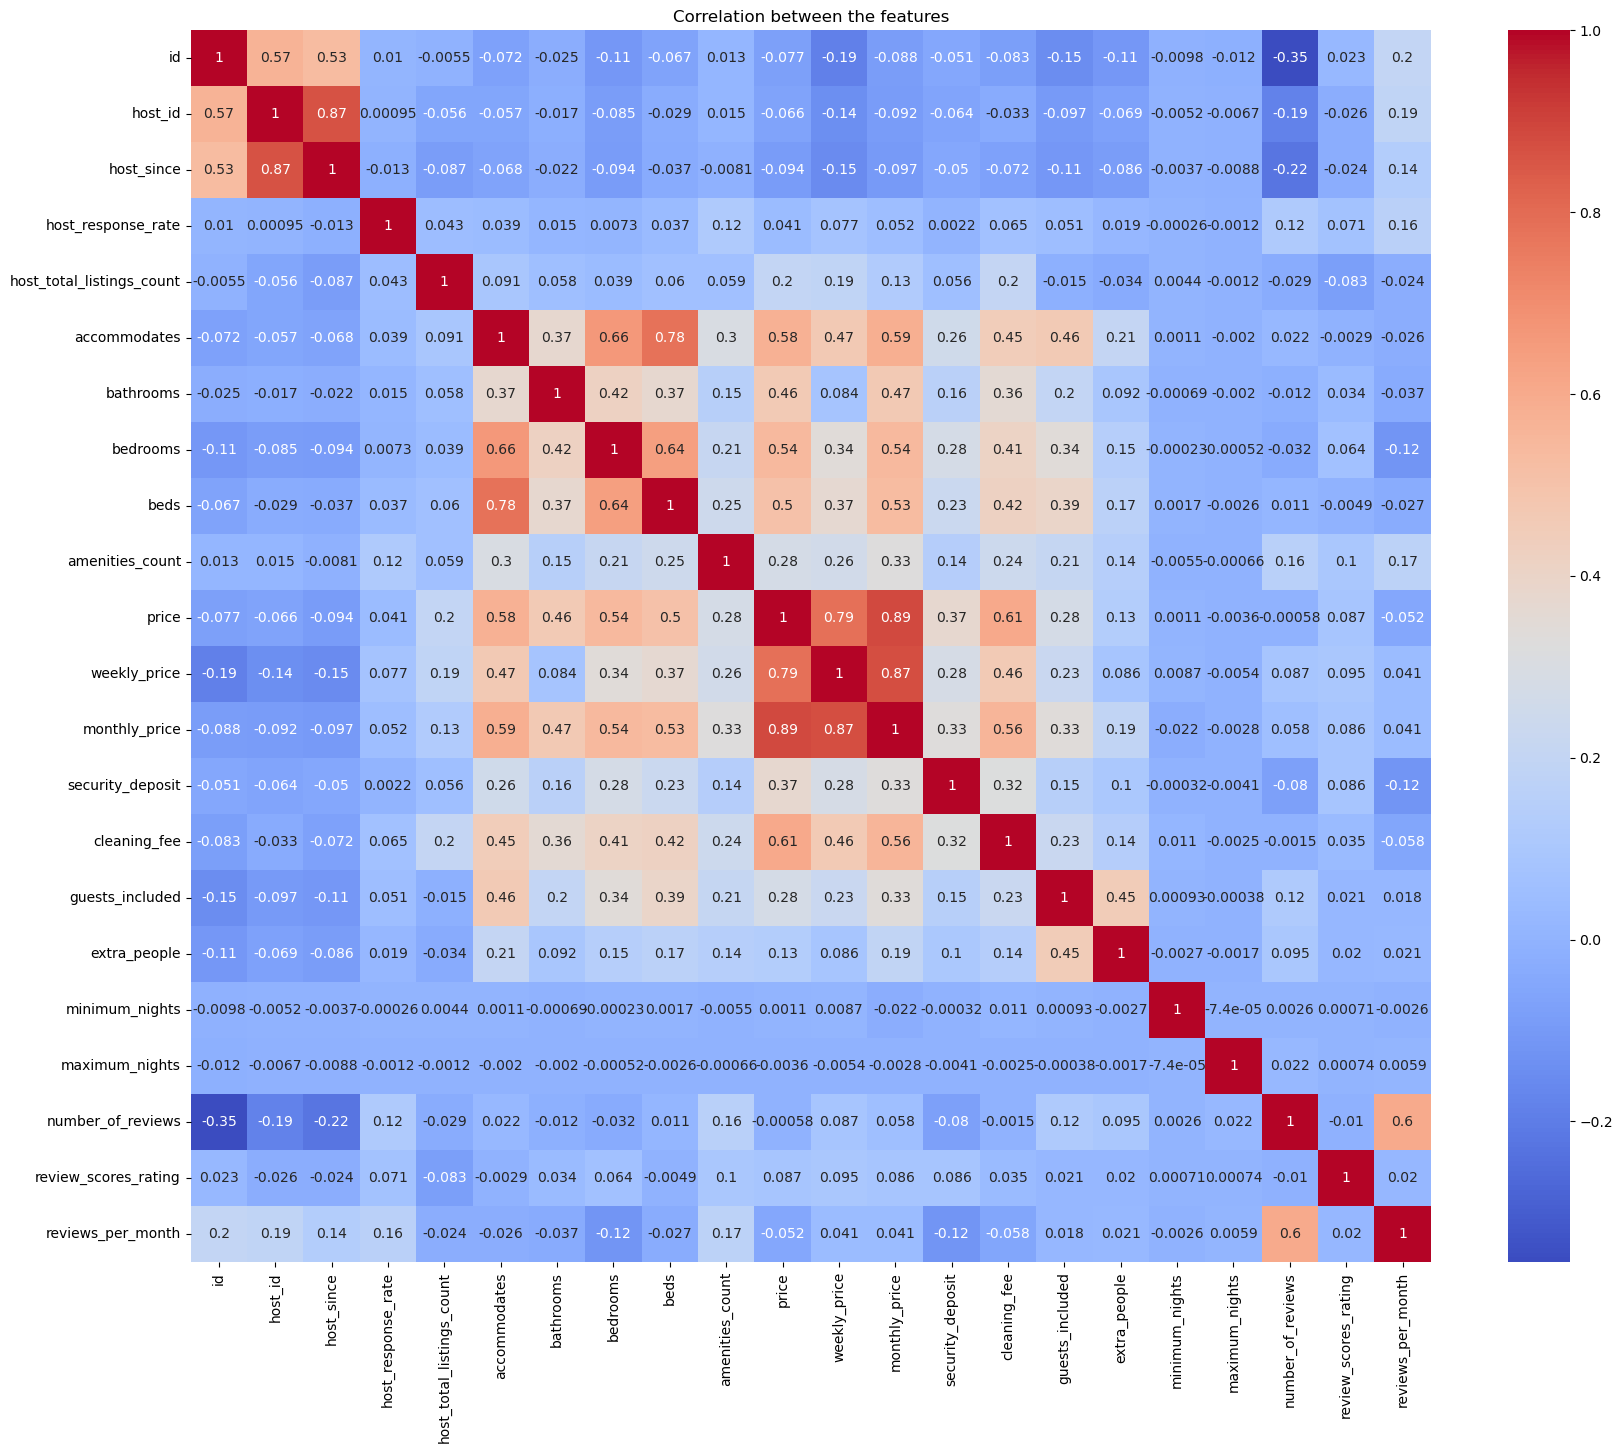

In [44]:
plt.figure(figsize=(20,16))
columns_for_Corr = df_capstone_project.select_dtypes(include="number")
columns_Corr = columns_for_Corr.corr()
sns.heatmap(columns_Corr, cmap = "coolwarm", annot = True)
plt.title("Correlation between the features")
plt.show()

### Reason for Dropping the columns: 
- In this project, we chose to focus solely on the price column for all pricing-related analysis. The weekly_price and monthly_price fields contained over 70% missing values, making them statistically unreliable and unsuitable for modeling, EDA, or for creating dashboard.This also helps reduce noise, avoid biased imputations, and simplifies our analysis and dashboarding process, focusing only on clean and reliable data.

- The price column, on the other hand, was well-populated, consistently defined as the standard per-night rate, and thus served as a more stable and informative feature.

### Reason of replacing null values in "Security Deposit" column with 0: 
- In Airbnb data, a missing security deposit typically means that no deposit is required for that listing. Hence, replacing NaN with 0 is both logical and reflects the real-world meaning of the missing value.


### Reason for doing city wise imputation on the "Cleaning Fee" column: 
- The cleaning fee often varies by location due to cost of living and service availability. Imputing missing values with the mean cleaning fee specific to each city ensures more accurate and contextual filling, instead of using a single global average which may misrepresent certain areas.

In [48]:
# Dropping the 'weekly_price' and 'monthly_price'.
df_capstone_project.drop(columns=["weekly_price", "monthly_price"], inplace=True)

# Fill missing values in security deposit with 0 and cleaning fee with the city wise mean.
df_capstone_project['security_deposit'].fillna(0, inplace=True)  # Replacing NaN with 0
df_capstone_project['cleaning_fee'] = df_capstone_project['cleaning_fee'].fillna( df_capstone_project.groupby('city')['cleaning_fee'].transform('mean'))


In [49]:
df_capstone_project.head()

id   host_id host_name  host_since  host_response_rate  \
0   6165738  31986651   Bernard     42120.0               100.0   
1  13908935  82489826     Enice     42559.0               100.0   
2   7713011  32492446   Vincent     42127.0               100.0   
3   3335054   2726446   Pascale     41084.0                 NaN   
4  10066518  30432969       Lea     42095.0                95.0   

   host_total_listings_count      city                 state zipcode country  \
0                        1.0    Thoiry           Rhône-Alpes    1710  France   
1                        1.0  Gaillard  Auvergne Rhône-Alpes   74240  France   
2                        7.0     Paris         Île-de-France   75018  France   
3                        1.0     Paris         Île-de-France   75018  France   
4                        2.0     Paris         Île-de-France   75018  France   

   ... security_deposit cleaning_fee  guests_included  extra_people  \
0  ...              0.0          NaN                1             0   
1  ...            560.0         28.0                1             6   
2  ...            100.0         30.0                1             5   
3  ...            150.0         15.0                1             0   
4  ...              0.0         15.0                1             0   

   minimum_nights  maximum_nights number_of_reviews  review_scores_rating  \
0               1            1125                 0                   NaN   
1               2              30                 1                  80.0   
2               4             365                37                  85.0   
3               3            1125                 1                 100.0   
4               2            1125                13                  97.0   

  cancellation_policy  reviews_per_month  
0            flexible                NaN  
1            moderate               1.00  
2              strict               1.84  
3            moderate               0.03  
4            moderate               0.89  

[5 rows x 30 columns]

### Checking for the value counts in the city column.

In [51]:
df_capstone_project["city"].apply(type).value_counts()

city
<class 'str'>    55546
Name: count, dtype: int64

### Checking for the datatypes in the dataset.

In [53]:
df_capstone_project.dtypes

id                              int64
host_id                         int64
host_name                      object
host_since                    float64
host_response_rate            float64
host_total_listings_count     float64
city                           object
state                          object
zipcode                        object
country                        object
property_type                  object
room_type                      object
accommodates                    int64
bathrooms                     float64
bedrooms                      float64
beds                          float64
bed_type                       object
amenities_count               float64
amenities_level              category
price                         float64
security_deposit              float64
cleaning_fee                  float64
guests_included                 int64
extra_people                    int64
minimum_nights                  int64
maximum_nights                  int64
number_of_re

### Checking for the null values in the dataset again.

In [55]:
df_capstone_project.isnull().sum()

id                               0
host_id                          0
host_name                        0
host_since                       0
host_response_rate           18286
host_total_listings_count        0
city                             0
state                            0
zipcode                          0
country                          0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
amenities_count                  0
amenities_level                  0
price                            0
security_deposit                 0
cleaning_fee                    31
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating         14493
cancellation_policy 

### Dropping the null values from the "cleaning fee" column as the null value left after treatment are very negligible.

In [57]:
column = ["cleaning_fee"]
df_capstone_project = df_capstone_project.dropna(subset=column, axis = 0)

In [58]:
df_capstone_project.shape

(55515, 30)

In [59]:
print(df_capstone_project.duplicated().value_counts())

False    55515
Name: count, dtype: int64


In [60]:
print(df_capstone_project["city"].unique())
print("\n")
print(df_capstone_project["city"].nunique())
print("\n")
print(df_capstone_project["state"].unique())
print("\n")
print(df_capstone_project["city"].nunique())


['Gaillard' 'Paris' 'Paris-18E-Arrondissement' 'Clichy'
 'Paris-10E-Arrondissement' 'Pantin' 'Paris-19E-Arrondissement'
 'Le Pré-Saint-Gervais' 'Deuil-la-Barre' 'Paris-15E-Arrondissement'
 'Issy les Moulineaux' 'Paris-12E-Arrondissement'
 'Paris-1ER-Arrondissement' 'Charenton-le-Pont' 'Paris 6e arrondissement'
 'Paris-6E-Arrondissement' 'Paris-8E-Arrondissement' 'Levallois-Perret'
 'Paris-3E-Arrondissement' 'Paris-20E-Arrondissement'
 'Paris-11E-Arrondissement' 'Ivry-sur-Seine' 'Paris-13E-Arrondissement'
 'PARIS' 'Paris-2E-Arrondissement' 'Collonges-sous-Salève' 'Archamps'
 'Paris-17E-Arrondissement' 'Le Kremlin-Bicêtre' 'Paris-4E-Arrondissement'
 'Saint-Ouen' 'Paris-14E-Arrondissement' 'Neuilly-sur-Seine'
 'Boulogne-Billancourt' 'Paris-16E-Arrondissement' 'Bagnolet'
 'Issy-les-Moulineaux' 'gaillard' 'Paris, Île-de-France, FR'
 'Paris-7E-Arrondissement' 'paris' 'Saint-Mandé' 'Paris-5E-Arrondissement'
 'París' 'Paris 75019' 'Gentilly' 'Montrouge' 'Aubervilliers'
 'Paris-9E-Arrondissemen

### To improve the accuracy of location-based analysis, the city and state columns were cleaned to correct inconsistencies such as variations in casing, extra spaces, duplicate names (e.g., "ParisParis"), and embedded postal codes (e.g., "75020 Paris"). A custom cleaning function was used to standardize entries while preserving meaningful district-level information like "paris-18e-arrondissement". This step ensures that identical locations are grouped correctly, leading to more reliable analysis and cleaner visualizations in the final dashboard.

In [62]:
import pandas as pd
import re

# Final cleaning function
def clean_location_final(val):
    if pd.isna(val):
        return ""

    val = str(val).lower().strip()

    # Fix common corruptions or garbled encodings for 'île-de-france'
    corrupted_ile_de_france = [
        "ãle-de-", "île-de-", "île de", "ile de", "île-de-francs", 
        "isla de francia", "ilha de frança", "法兰西岛", "法蘭西島",
        "iles-de-", "isle-de-", "idf", "idf bis", "ile-de-", "iles de", "il de"
    ]
    for pattern in corrupted_ile_de_france:
        if pattern in val:
            return "île-de-france"

    # Normalize Rhône-Alpes and its variants
    if "rhône-alpes" in val or "rhone-alpes" in val or "auvergne" in val:
        return "auvergne-rhône-alpes"

    # Remove unwanted codes or junk
    if re.match(r'^\d+$', val) or val in ["-", "refait à neuf", "bon", "3", "75"]:
        return "unknown"

    # Remove extra spaces and unwanted characters
    val = re.sub(r'\s+', ' ', val)                        # Normalize spaces
    val = re.sub(r'[^\w\s\-éèàçôûüïê]', '', val)          # Keep French characters
    val = re.sub(r'\b(fr|france)\b', '', val)             # Remove fr or france
    val = re.sub(r'\b\d{5}\b', '', val)                   # Remove postal codes
    val = re.sub(r'\bparisparis\b', 'paris', val)
    val = re.sub(r'\bparis paris\b', 'paris', val)
    val = val.strip()

    # Normalize slight variations of Paris
    if re.match(r'^paris\s*\d*$', val) or re.match(r'^paris\d+$', val):
        return "paris"

    return val

# Applying to the DataFrame
df_capstone_project['city'] = df_capstone_project['city'].apply(clean_location_final)
df_capstone_project['state'] = df_capstone_project['state'].apply(clean_location_final)

# Showing the result sample
print("Unique cities after full cleaning:", df_capstone_project['city'].nunique())
print("Top 10 cleaned cities:\n", df_capstone_project['city'].value_counts().head(10))
print("Unique states after full cleaning:", df_capstone_project['state'].nunique())
print("Top 10 cleaned states:\n", df_capstone_project['state'].value_counts().head(10))


Unique cities after full cleaning: 89
Top 10 cleaned cities:
 city
paris                       53052
berlin                        576
paris-19e-arrondissement      170
paris-15e-arrondissement      147
paris-18e-arrondissement      121
paris-20e-arrondissement      112
paris-16e-arrondissement       92
paris-11e-arrondissement       89
paris-10e-arrondissement       81
paris-17e-arrondissement       77
Name: count, dtype: int64
Unique states after full cleaning: 23
Top 10 cleaned states:
 state
île-de-france           54791
berlin                    576
                           55
paris                      42
auvergne-rhône-alpes       20
ãle-de-                     8
unknown                     6
montmartre                  2
le marais                   1
champs-élysées              1
Name: count, dtype: int64


### Exporting the df_capstone_project to df_capstone_project_2.

In [64]:
df_capstone_project.to_csv("df_capstone_project_2.csv", index=False)

### There were host_names that were mentioned in the number format in the df_capstone_project_2 and they were different from the other names in the dataset and also there were 55 null values in the state column, so i have removed them using excel by using the filter option.And, i have saved the datafile with the name "df_capstone_project_updated" and used it for further preprocessing part.

### Reading the updated datafile.

In [67]:
df_capstone_project_updated = pd.read_csv("df_capstone_project_updated.csv")
df_capstone_project_updated

id   host_id                                   host_name  \
0      13908935  82489826                                       Enice   
1       7713011  32492446                                     Vincent   
2       3335054   2726446                                     Pascale   
3      10066518  30432969                                         Lea   
4      11770964  62659156                                      Gérard   
...         ...       ...                                         ...   
55444  13537098  77859450                                     Yasemin   
55445  18064664  14629591                                      Evelyn   
55446  13457300  76897030                                        Ayse   
55447   7535101   1148921                                         Tom   
55448  14355153  87993681  Annasophiapaus@(SENSITIVE CONTENTS HIDDEN)   

       host_since  host_response_rate  host_total_listings_count  \
0           42559               100.0                          1   
1           42127               100.0                          7   
2           41084                 NaN                          1   
3           42095                95.0                          2   
4           42441                 NaN                          1   
...           ...                 ...                        ...   
55444       42536                 NaN                          1   
55445       41752               100.0                          1   
55446       42531               100.0                          2   
55447       40798               100.0                          3   
55448       42586                 0.0                          1   

                           city                 state zipcode  country  ...  \
0                      gaillard  auvergne-rhône-alpes   74240   France  ...   
1                         paris         île-de-france   75018   France  ...   
2                         paris         île-de-france   75018   France  ...   
3                         paris         île-de-france   75018   France  ...   
4      paris-18e-arrondissement         île-de-france   75018   France  ...   
...                         ...                   ...     ...      ...  ...   
55444                    berlin                berlin   10245  Germany  ...   
55445                    berlin                berlin   10247  Germany  ...   
55446                    berlin                berlin   10179  Germany  ...   
55447                    berlin                berlin   10115  Germany  ...   
55448                    berlin                berlin   10969  Germany  ...   

      security_deposit cleaning_fee  guests_included  extra_people  \
0                  560    28.000000                1             6   
1                  100    30.000000                1             5   
2                  150    15.000000                1             0   
3                    0    15.000000                1             0   
4                  300    27.763158                1             0   
...                ...          ...              ...           ...   
55444              200    25.833846                1             0   
55445                0    25.833846                1             0   
55446              500    25.833846                2             0   
55447              250    49.000000                1            15   
55448                0    25.833846                1             0   

       minimum_nights  maximum_nights number_of_reviews  review_scores_rating  \
0                   2              30                 1                  80.0   
1                   4             365                37                  85.0   
2                   3            1125                 1                 100.0   
3                   2            1125                13                  97.0   
4                   2              20                 0                   NaN   
...               ...             ...      

### Checking for the shape of the updated dataset and we can see that the two rows have been dropped using excel.

In [69]:
df_capstone_project_updated.shape

(55449, 30)

### Checking for the null values in the updated dataset.

In [71]:
df_capstone_project_updated.isnull().sum()

id                               0
host_id                          0
host_name                        0
host_since                       0
host_response_rate           18262
host_total_listings_count        0
city                             0
state                            0
zipcode                          0
country                          0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
amenities_count                  0
amenities_level                  0
price                            0
security_deposit                 0
cleaning_fee                     0
guests_included                  0
extra_people                     0
minimum_nights                   0
maximum_nights                   0
number_of_reviews                0
review_scores_rating         14469
cancellation_policy 

## Reasons for filling Nan values with 0:
- Host response rate, review scores rating, reviews_per_month: A null value in these often means the listing has simply not received any reviews yet or there was no response by the host. Replacing it with 0 accurately reflects this absence of activity.

In [73]:
values = {"host_response_rate":0,
          "review_scores_rating":0,
          "reviews_per_month":0
         }

df_capstone_project_updated.fillna(value=values,inplace=True)

In [74]:
df_capstone_project_updated.isnull().sum()

id                           0
host_id                      0
host_name                    0
host_since                   0
host_response_rate           0
host_total_listings_count    0
city                         0
state                        0
zipcode                      0
country                      0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities_count              0
amenities_level              0
price                        0
security_deposit             0
cleaning_fee                 0
guests_included              0
extra_people                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating         0
cancellation_policy          0
reviews_per_month            0
dtype: int64

In [75]:
df_capstone_project_updated.dtypes

id                             int64
host_id                        int64
host_name                     object
host_since                     int64
host_response_rate           float64
host_total_listings_count      int64
city                          object
state                         object
zipcode                       object
country                       object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                       int64
beds                           int64
bed_type                      object
amenities_count                int64
amenities_level               object
price                          int64
security_deposit               int64
cleaning_fee                 float64
guests_included                int64
extra_people                   int64
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
r

In [76]:
print(df_capstone_project_updated["id"].nunique())

55449


In [77]:
df_capstone_project_updated["host_id"].nunique()

47518

### Now creating a new csv file with the cleaned data that will be used for EDA and analysis.

In [79]:
df_capstone_project_updated.to_csv("df_capstone_cleaned.csv", index=False)     

In [80]:
# Reading the df_capstone_cleaned csv file 
df_capstone_cleaned = pd.read_csv("df_capstone_cleaned.csv")
df_capstone_cleaned.head()

id   host_id host_name  host_since  host_response_rate  \
0  13908935  82489826     Enice       42559               100.0   
1   7713011  32492446   Vincent       42127               100.0   
2   3335054   2726446   Pascale       41084                 0.0   
3  10066518  30432969       Lea       42095                95.0   
4  11770964  62659156    Gérard       42441                 0.0   

   host_total_listings_count                      city                 state  \
0                          1                  gaillard  auvergne-rhône-alpes   
1                          7                     paris         île-de-france   
2                          1                     paris         île-de-france   
3                          2                     paris         île-de-france   
4                          1  paris-18e-arrondissement         île-de-france   

  zipcode country  ... security_deposit cleaning_fee  guests_included  \
0   74240  France  ...              560    28.000000                1   
1   75018  France  ...              100    30.000000                1   
2   75018  France  ...              150    15.000000                1   
3   75018  France  ...                0    15.000000                1   
4   75018  France  ...              300    27.763158                1   

   extra_people  minimum_nights  maximum_nights number_of_reviews  \
0             6               2              30                 1   
1             5               4             365                37   
2             0               3            1125                 1   
3             0               2            1125                13   
4             0               2              20                 0   

   review_scores_rating cancellation_policy  reviews_per_month  
0                  80.0            moderate               1.00  
1                  85.0              strict               1.84  
2                 100.0            moderate               0.03  
3                  97.0            moderate               0.89  
4                   0.0              strict               0.00  

[5 rows x 30 columns]

## Now the data has been cleaned , and now we will we proceeding with the EDA part.

#### Importing the necessary files for EDA and creating a copy of the cleaned datafile in order to retain the authenticity of the cleaned dataset.

In [83]:
# Impporting the libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
df_capstone_cleaned_copy = df_capstone_cleaned.copy()

### Checking for the structure and dtypes of the cleaned dataset.

In [85]:
df_capstone_cleaned_copy.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_rate',
       'host_total_listings_count', 'city', 'state', 'zipcode', 'country',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities_count', 'amenities_level', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy', 'reviews_per_month'],
      dtype='object')

In [86]:
df_capstone_cleaned.dtypes

id                             int64
host_id                        int64
host_name                     object
host_since                     int64
host_response_rate           float64
host_total_listings_count      int64
city                          object
state                         object
zipcode                       object
country                       object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                       int64
beds                           int64
bed_type                      object
amenities_count                int64
amenities_level               object
price                          int64
security_deposit               int64
cleaning_fee                 float64
guests_included                int64
extra_people                   int64
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
r

### Checking for the spread of price across France and Germany.

In [88]:
france_data = df_capstone_cleaned_copy[df_capstone_cleaned_copy["country"] == "France"]
germany_data = df_capstone_cleaned_copy[df_capstone_cleaned_copy["country"] == "Germany"]

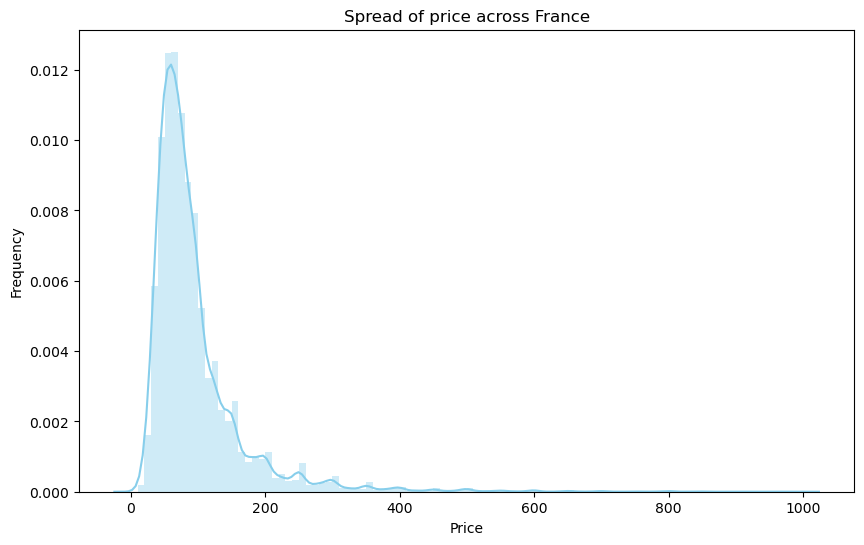

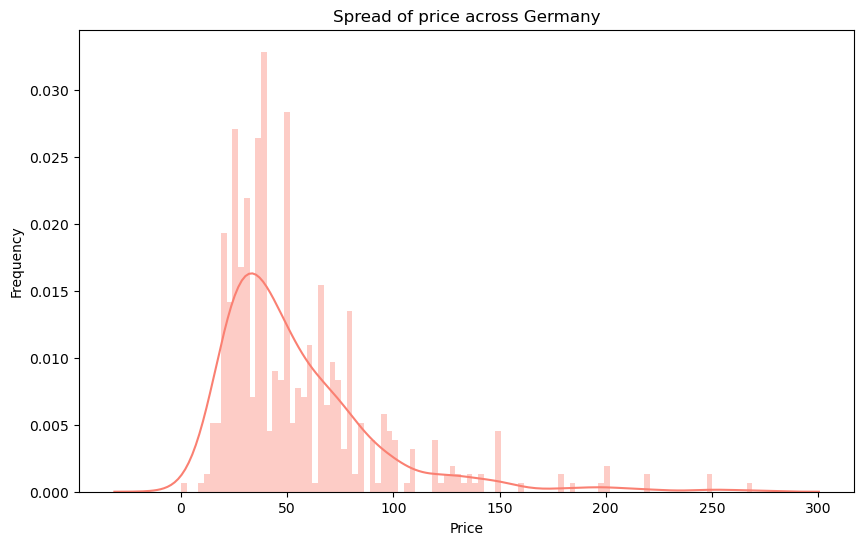

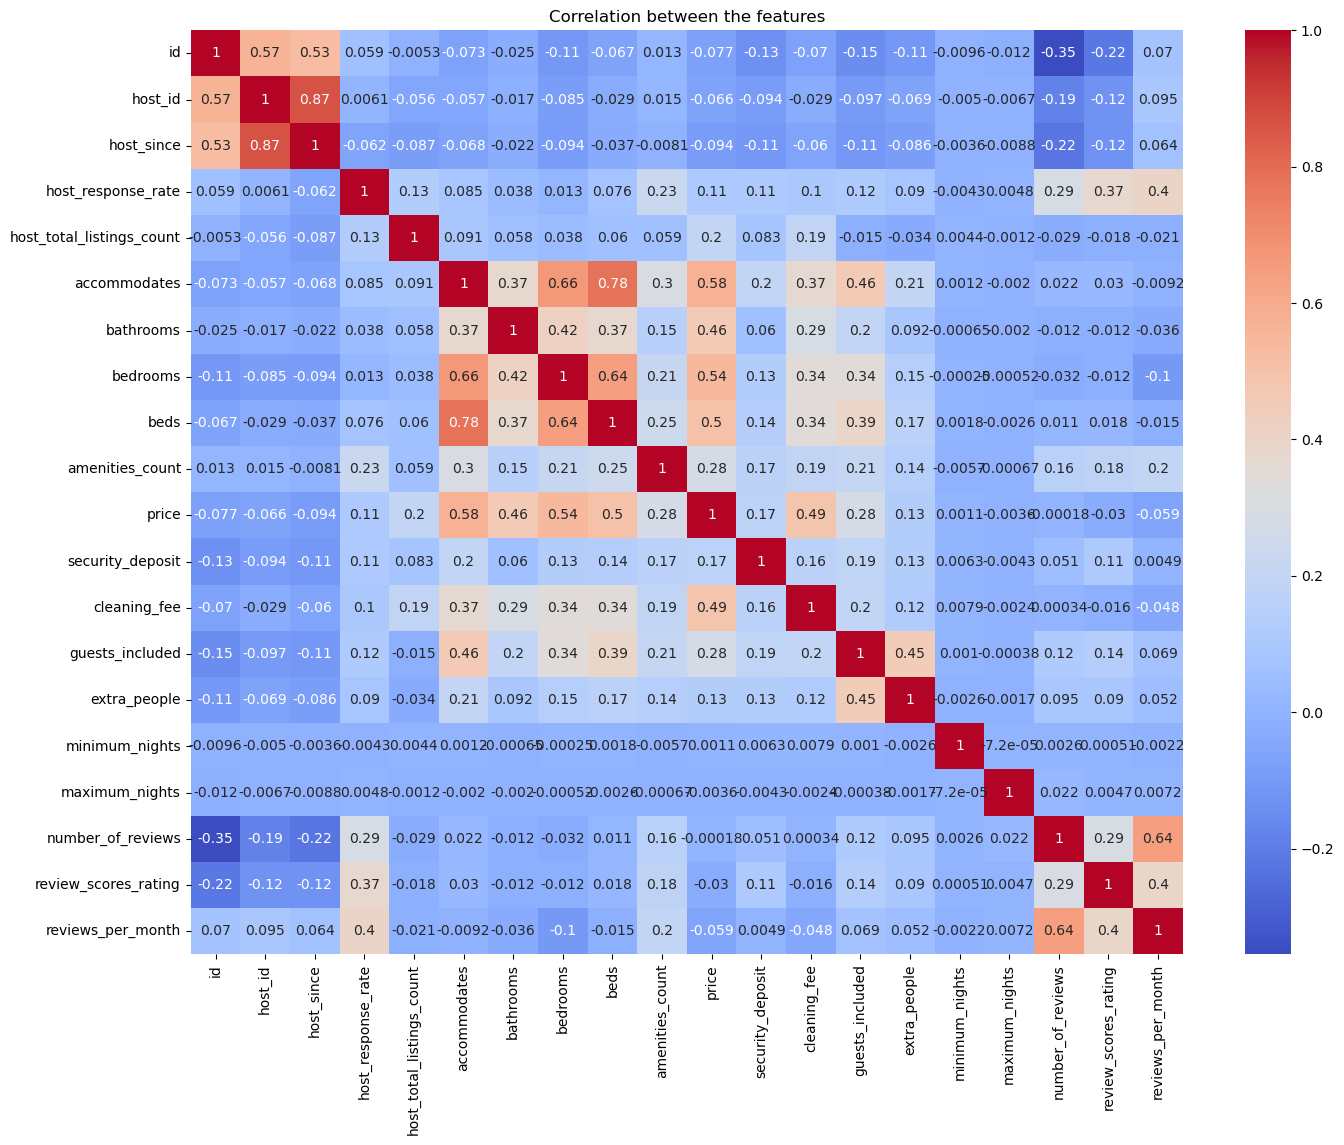

In [89]:
# Checking for the spread of price across france.
plt.figure(figsize=(10,6))
sns.distplot(x = france_data["price"], bins = 100, color="skyblue")
plt.title("Spread of price across France")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# Checking for the spread of price across germany.
plt.figure(figsize=(10,6))
sns.distplot(x = germany_data["price"], bins = 100, color = "salmon")
plt.title("Spread of price across Germany")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Checking for the correlation between the columns in the cleaned data.
plt.figure(figsize=(16,12))
numeric_columns = df_capstone_cleaned_copy.select_dtypes(include="number")
numeric_columns_corr = numeric_columns.corr()
sns.heatmap(numeric_columns_corr, cmap = "coolwarm", annot = True)
plt.title("Correlation between the features")
plt.show()

- As we can see that the price across France and Germany is not normally distributed, and it is having right skewed price for both the countries. It also means there may be a presence of outliers in the dataset.

# Focus Area 1 : Listings and Host Performance

## Objective 1: Analyze host and listing performance to determine the key factors driving higher bookings and revenue.

### $1$) What is the average price of top 10 listings city-wise ?

In [94]:
city_wise_price_avg = df_capstone_cleaned_copy.groupby("city")["price"].mean()

# Creating a new dataframe for top 10 cities with avg price
top_10_cities_by_price_df = city_wise_price_avg.sort_values(ascending = False).head(10).reset_index()
top_10_cities_by_price_df.columns = ["city","avg_price"]
print( top_10_cities_by_price_df)

                       city   avg_price
0      rue de turenne paris  400.000000
1                 paris 18e  250.000000
2                   ambilly  196.000000
3                  paris 8è  185.000000
4           prévessin-moëns  174.000000
5          nogent-sur-marne  167.000000
6                paris 4eme  150.000000
7  paris 11e arrondissement  149.000000
8   paris-8e-arrondissement  148.200000
9   paris 6e arrondissement  147.666667


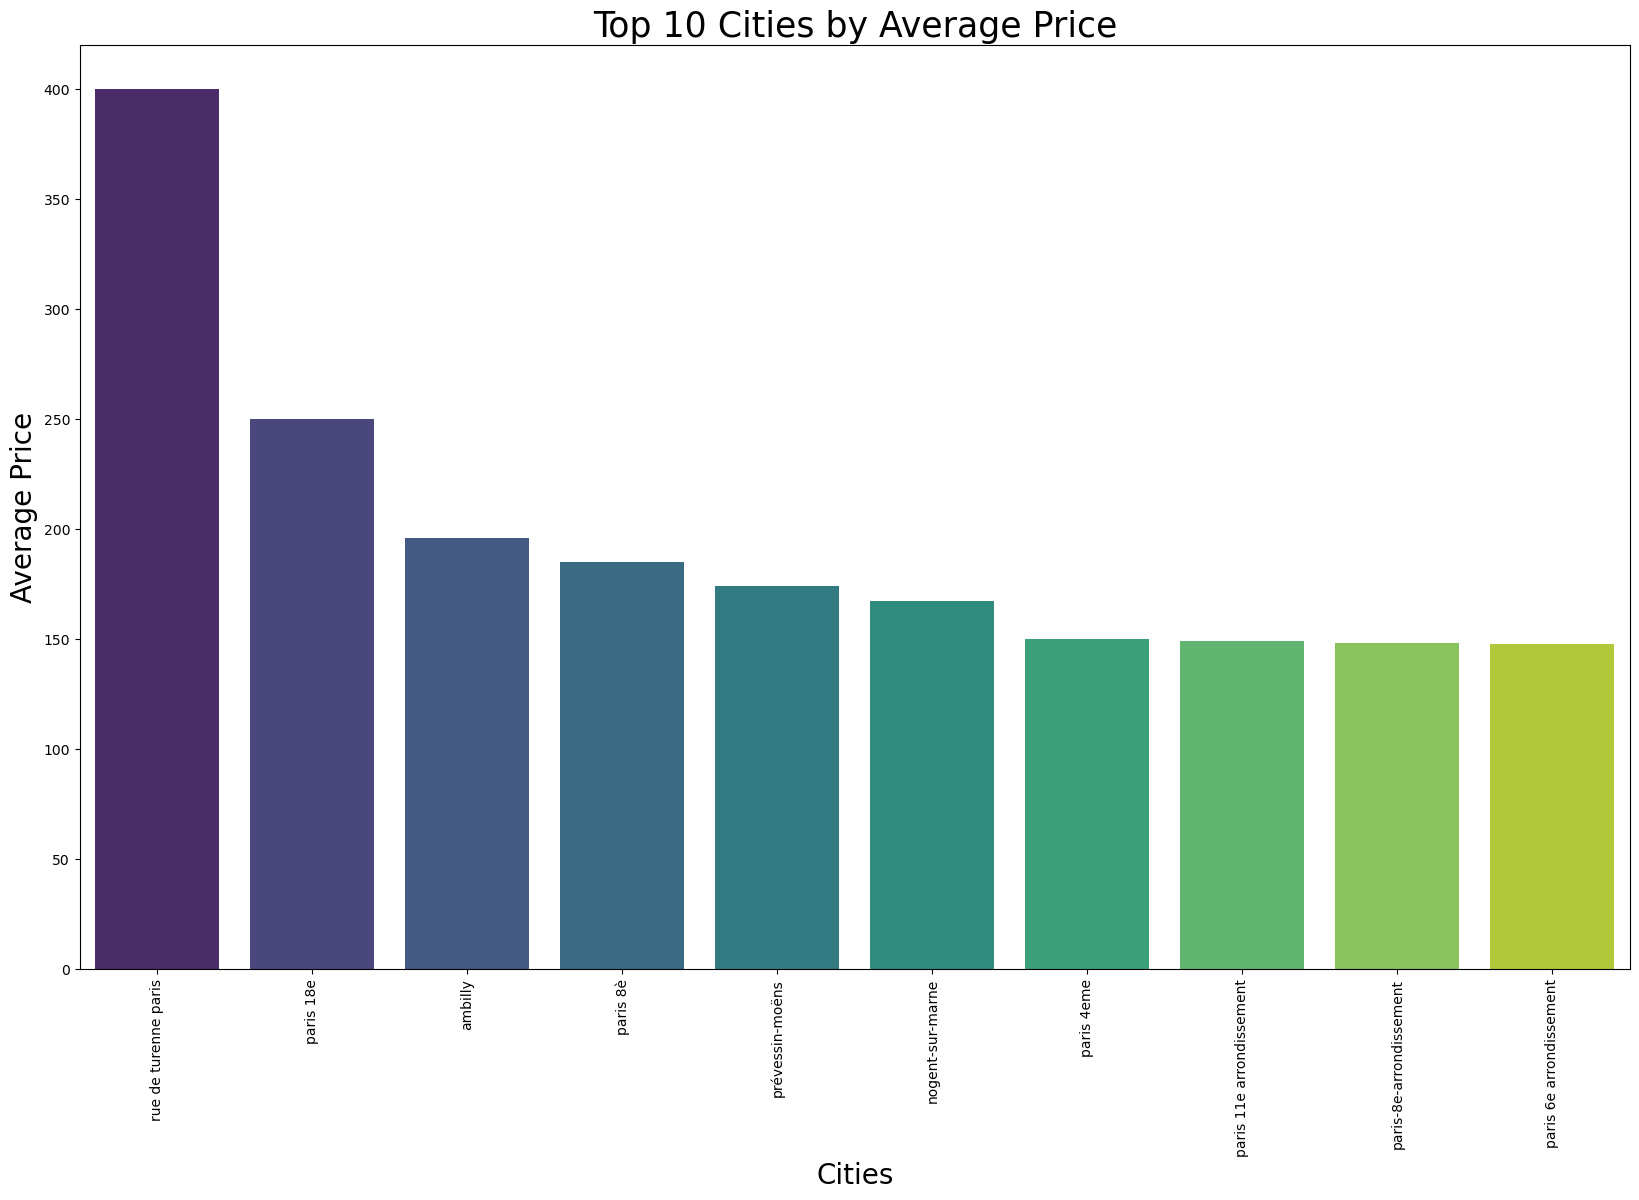

In [95]:
# Visualizing the top 10 cities by avg price 

plt.figure(figsize=(20,12))
sns.barplot(x = top_10_cities_by_price_df["city"], y = top_10_cities_by_price_df["avg_price"], palette = "viridis")
plt.title("Top 10 Cities by Average Price", fontsize = 25)
plt.xlabel("Cities", fontsize = 20)
plt.ylabel("Average Price", fontsize = 20)
plt.xticks(rotation = 90)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\top_10_listings_per_neighbourhood_new.png", dpi = 300, format = "png")
plt.show()


##### Interpretation:
- In summary, the chart highlights that "Rue de Turenne,Paris" is highly expensive compared to other cities. It is followed by "Paris 18e" with a noticeable drop in the average price.
- It also depicts that maybe cities having average price > 300 are potential outliers.

### $2$) How does the number of reviews correlate with the listing price ?

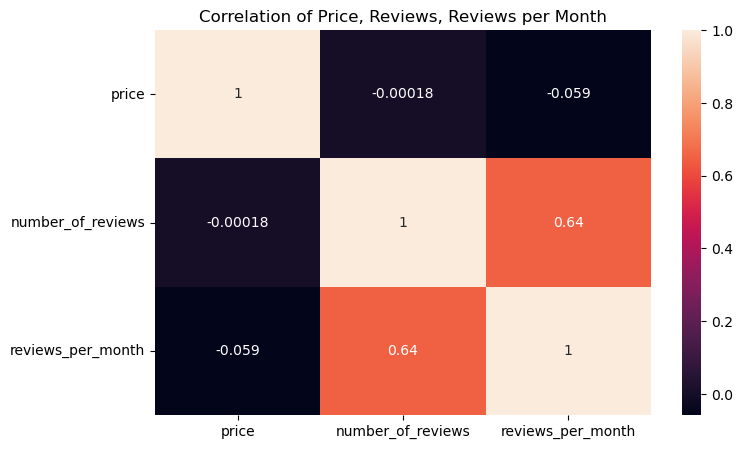

In [98]:
correlation_columns = df_capstone_cleaned_copy[["price","number_of_reviews","reviews_per_month"]].corr()

# Creating a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlation_columns, xticklabels=correlation_columns.columns, yticklabels=correlation_columns.columns, annot = True)
plt.title("Correlation of Price, Reviews, Reviews per Month")
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area1_obj1_Q2.png", dpi = 300, format = "png")
plt.show()

##### Interpretation: 
- There is no linear correlation between the 'price' and 'number_of_reviews' or 'reviews_per_month'.
- There is a moderately strong positive correlation between the 'number_of_reviews' and 'reviews_per_month'.

## Objective 2: Predict listing prices and analyze host performance using regression and classification models.


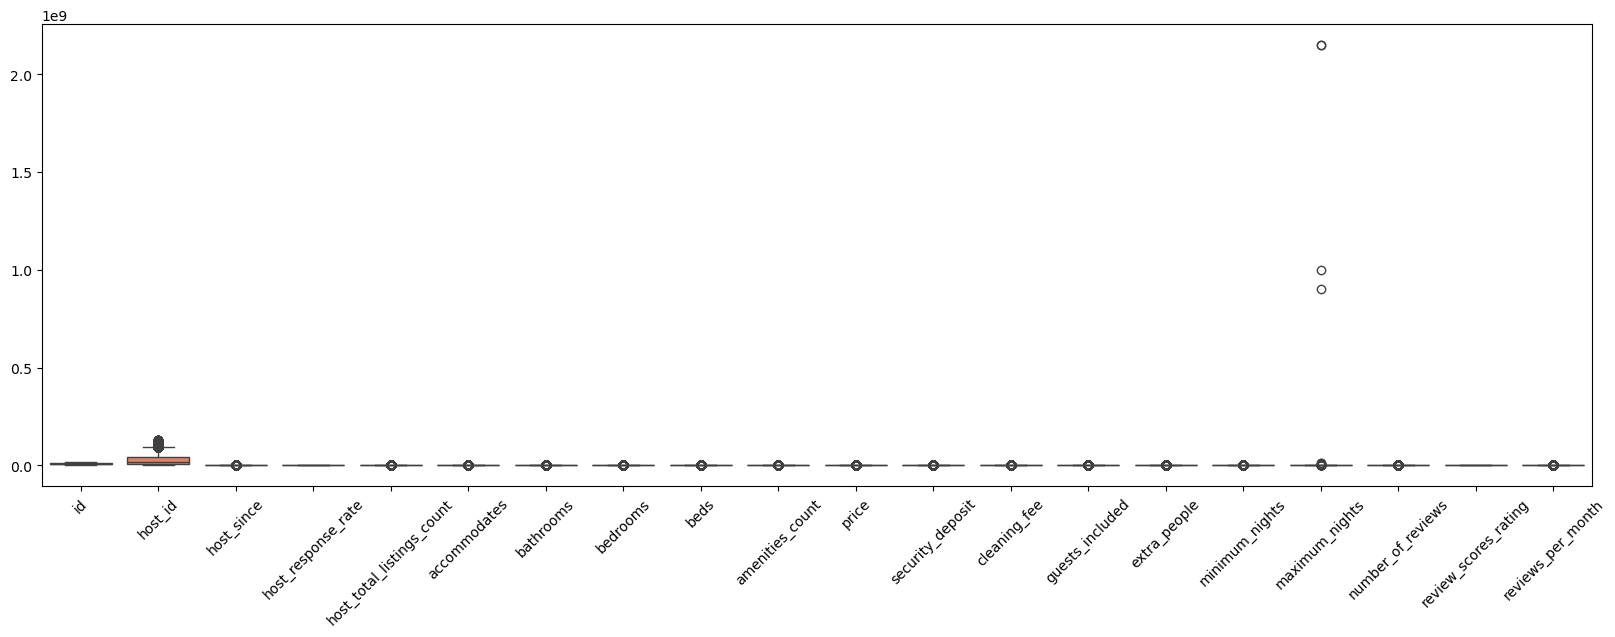

In [101]:
# Boxplot with the outliers before the outlier capping.
sns.boxplot(data = df_capstone_cleaned)
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation = 45)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\boxplot_before_outlier_capping.png", dpi = 300, format = "png")
plt.show()

In [102]:
import numpy as np

### Outlier capping using the IQR method is preferred when we want to limit the influence of extreme values without removing valuable data. Unlike deletion, which can result in significant data loss, capping preserves the entire dataset by replacing values above the upper bound or below the lower bound with the respective threshold values. This helps reduce skewness and improves model stability, especially for linear and distance-based models that are sensitive to outliers. Additionally, capping ensures that the contextual information from other features in those rows is retained, maintaining the structure and richness of the dataset. Overall, it's a balanced and data-preserving approach to handling outliers before model building.

In [104]:
df_capstone_cleaned_copy_2 = df_capstone_cleaned.copy()
columns = ["host_since","host_response_rate","host_total_listings_count","accommodates","bedrooms","beds",
                                         "amenities_count","price","security_deposit","cleaning_fee","guests_included","extra_people",
                                         "minimum_nights","maximum_nights","number_of_reviews","review_scores_rating","reviews_per_month"]

for col in columns:
    Q1 = df_capstone_cleaned_copy_2[col].quantile(0.25)
    Q3 = df_capstone_cleaned_copy_2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_capstone_cleaned_copy_2[col] = np.where(df_capstone_cleaned_copy_2[col] > upper, upper,
                                               np.where(df_capstone_cleaned_copy_2[col] < lower, lower, df_capstone_cleaned_copy_2[col]))

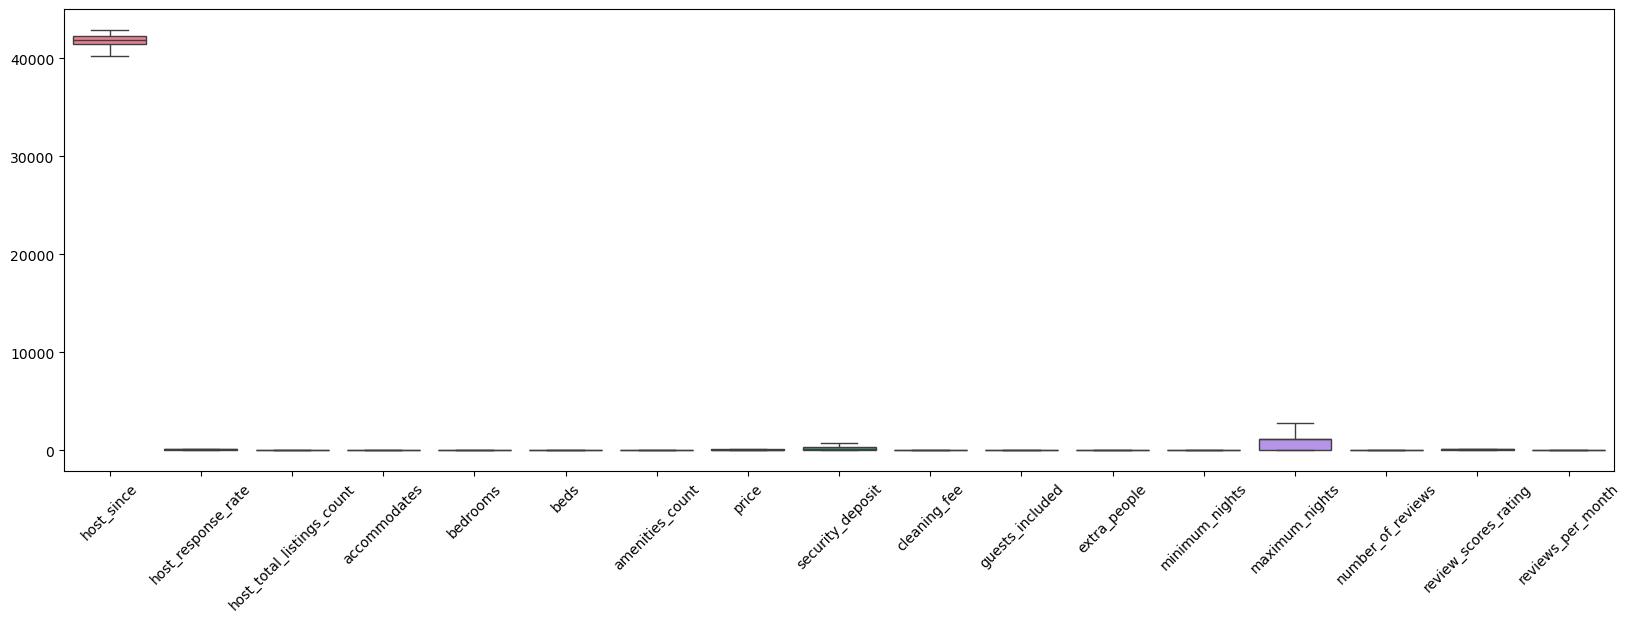

In [105]:
# Boxplot after the outliers capping.
sns.boxplot(data = df_capstone_cleaned_copy_2[columns])
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation = 45)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\boxplot_after_outlier_capping.png", dpi = 300, format = "png")
plt.show()

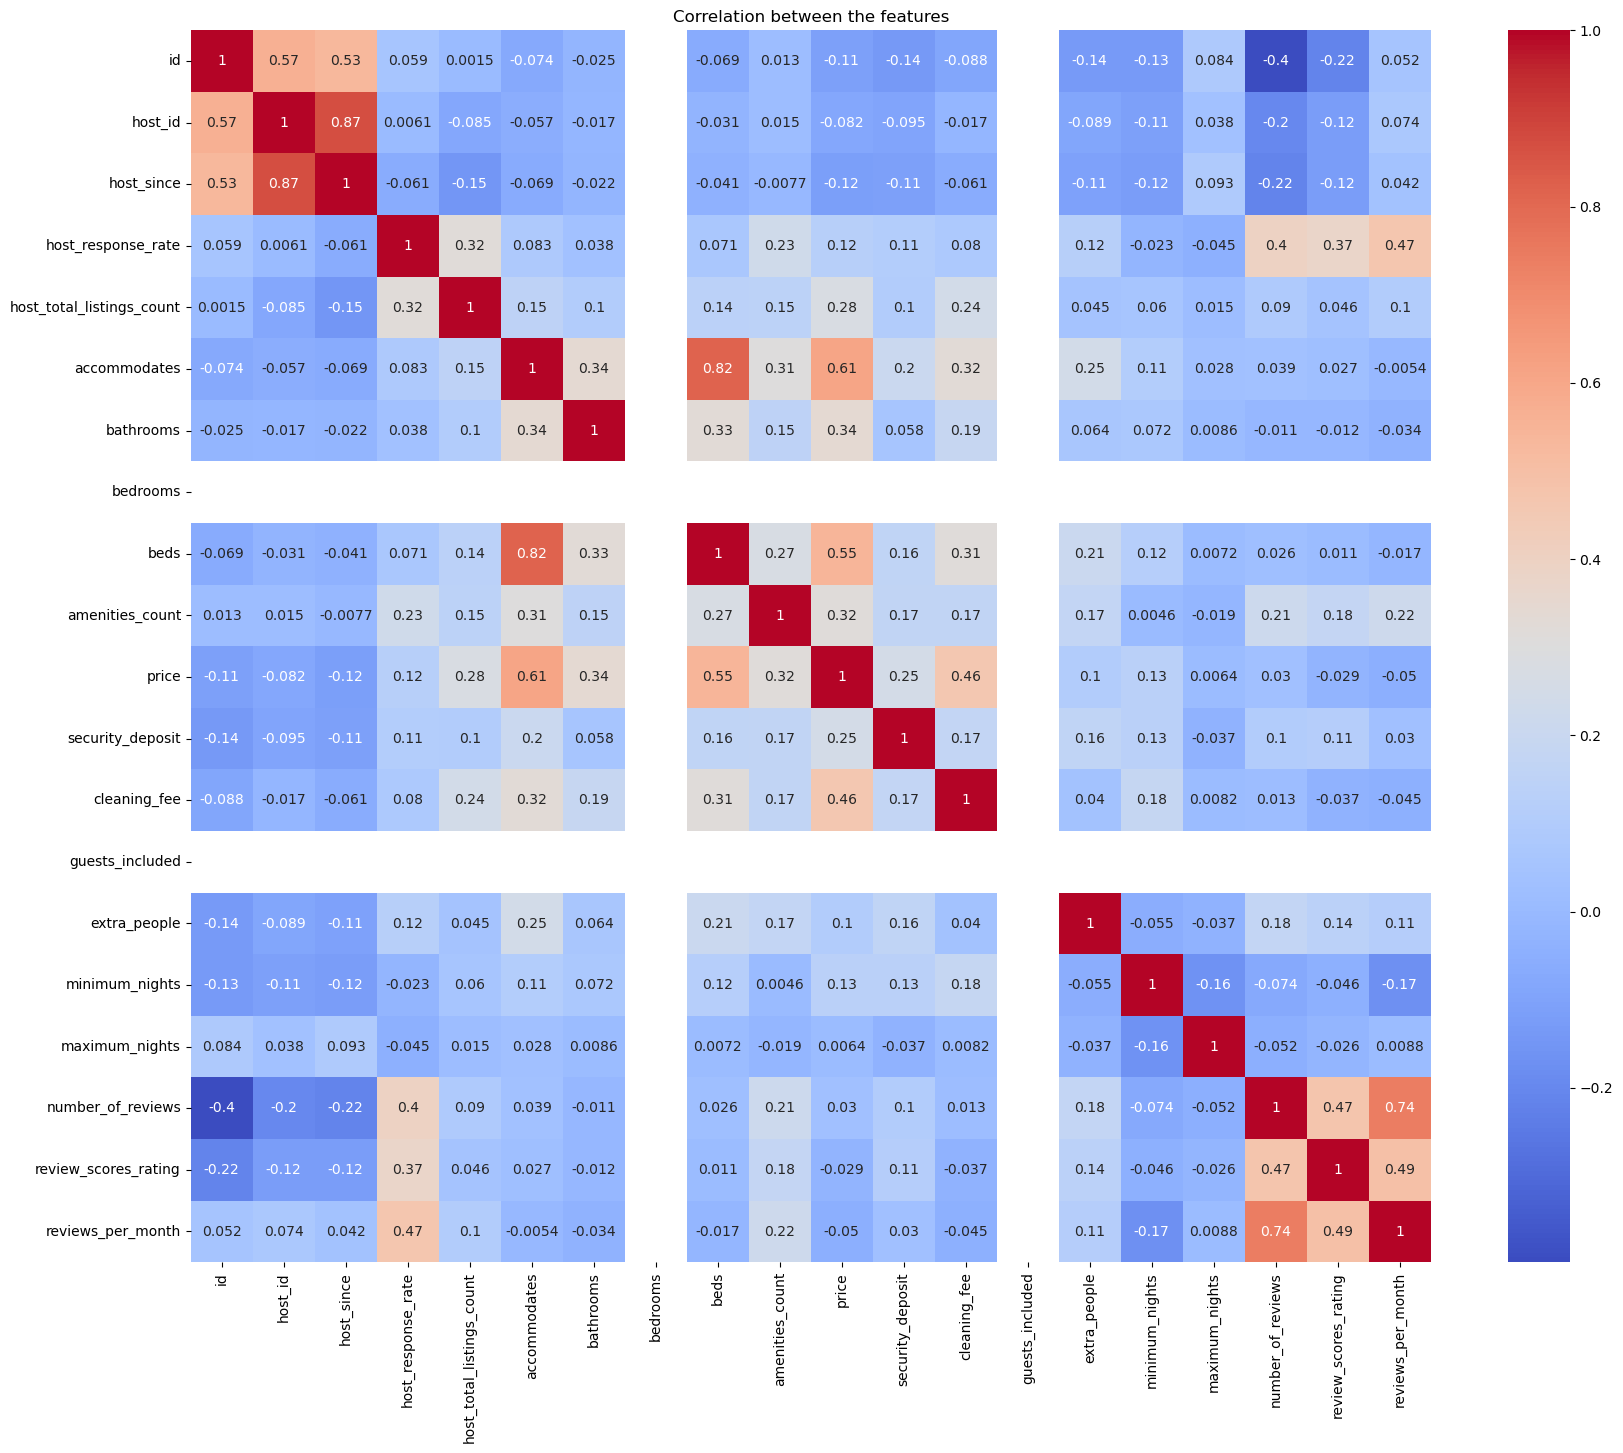

In [106]:
# Checking for the correlation between the columns in the cleaned data.
plt.figure(figsize=(20,16))
numeric_column = df_capstone_cleaned_copy_2.select_dtypes(include="number")
numeric_columns_corr = numeric_column.corr()
sns.heatmap(numeric_columns_corr, cmap = "coolwarm", annot = True)
plt.title("Correlation between the features")
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\correlation_bw_columns_cleaned_data.png", dpi = 300, format = "png")
plt.show()

In [107]:
# Label encoding for the required columns
from sklearn.preprocessing import LabelEncoder
cat_cols = ["property_type","room_type","bed_type","amenities_level","cancellation_policy"]
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_capstone_cleaned_copy_2[col] = le.fit_transform(df_capstone_cleaned_copy_2[col].astype(str)).astype("int64")
    label_encoders[col] = le


In [108]:
print(df_capstone_cleaned_copy_2["room_type"])

0        0
1        0
2        0
3        0
4        0
        ..
55444    1
55445    1
55446    0
55447    0
55448    0
Name: room_type, Length: 55449, dtype: int64


In [109]:
print(label_encoders['room_type'].classes_)

['Entire home/apt' 'Private room' 'Shared room']


### $1$) Can we predict listing price using attributes such as the number of reviews, host listings count, and room type ( using simple linear regression) ?

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# Selecting the features and target
features_1 = ["number_of_reviews","host_total_listings_count","room_type"]

X = df_capstone_cleaned_copy_2[features_1]
y = df_capstone_cleaned_copy_2["price"]

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

# Fitting the Linear model
model = LinearRegression()
model.fit(X_train,y_train)

# Predicting price for a new input
y_pred = model.predict(X_test)

# Calculating the R2 score, Mae and Rmse
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f"R2 score: {r2:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")


# Assigning new input values
new_input_values = [[40,8,1]]

# Scaling the new input values
new_input_values_scaled = scaler.transform(new_input_values)

# Predict the price for the new input
new_input_predicted_price = model.predict(new_input_values_scaled)

print(f"Predicted price of new input: ${new_input_predicted_price[0]:.2f}")


R2 score: 0.18
MAE : 30.48
RMSE : 38.82
Predicted price of new input: $150.40


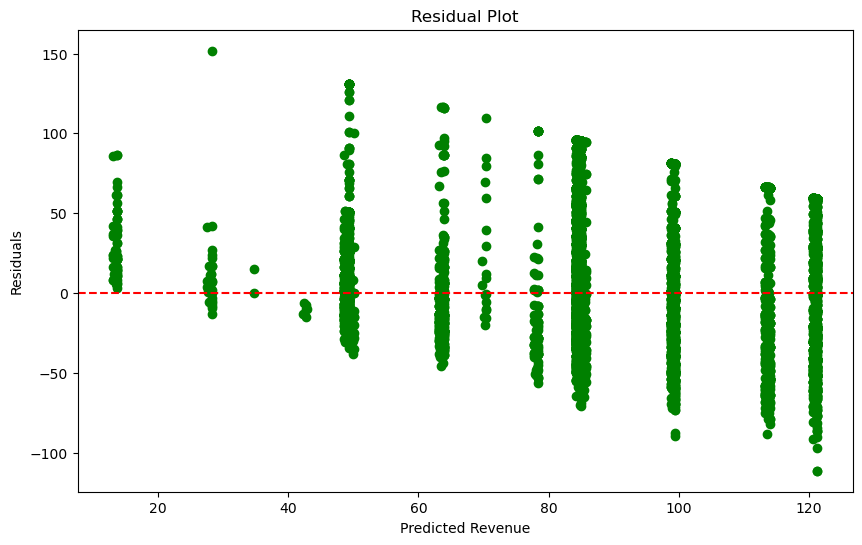

In [112]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area1_obj2_q1.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- The linear regression model developed to predict listing price using features like number of reviews, host total listings count, and room type has shown a low R² score of 0.18. This indicates that only 18% of the variability in the listing price is being explained by the current model, which suggests that the relationship between these features and price is weak or that key influential variables may be missing.
- The Mean Absolute Error (MAE) is 30.48, meaning that on average, the model's predictions deviate from the actual prices by about $30.48.While this may appear acceptable, it needs to be assessed in the context of the typical price range. If, for example, the average price is around 150, this would indicate a relative error of over 20%, which is considered moderate to high.
- The residual plot further supports these observations. Ideally, residuals should be randomly scattered around zero (the red dashed line), indicating homoscedasticity (equal variance). However, your residual plot shows vertical clustering and non-random patterns, implying that:

The model may not be capturing non-linear patterns.

Residuals vary with the predicted value → heteroscedasticity.

Model might be underfitting (not complex enough to capture patterns).

##### Points for Improvement
- Add more predictive features such as location, amenities ,number of bedrooms, etc.
- Since relationships might not be linear, consider using Random Forests, etc.

In [114]:
# Updating features list using feature engineering
features_new = ["number_of_reviews","host_total_listings_count","room_type","accommodates","beds"]

X = df_capstone_cleaned_copy_2[features_new]
y = df_capstone_cleaned_copy_2["price"]

# Data scaling all the features again
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=2)

# Fitting the linear model
model = LinearRegression()
model.fit(X_train,y_train)

# Predicting the price for a new input
y_pred = model.predict(X_test)

#Calculating the R2 score, Mae and Mse values
r2_new = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f"R2 score: {r2_new:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# Assigning new input values
new_input_values_1 = [[40,8,1,2,1]]

# Scaling the new input values
new_input_values_scaled_1 = scaler.transform(new_input_values_1)

# Predict the price for the new input
new_input_predicted_price_1 = model.predict(new_input_values_scaled_1)

print(f"Predicted price of new input: ${new_input_predicted_price_1[0]:.2f}")

R2 score: 0.45
MAE : 24.77
RMSE : 32.14
Predicted price of new input: $117.88


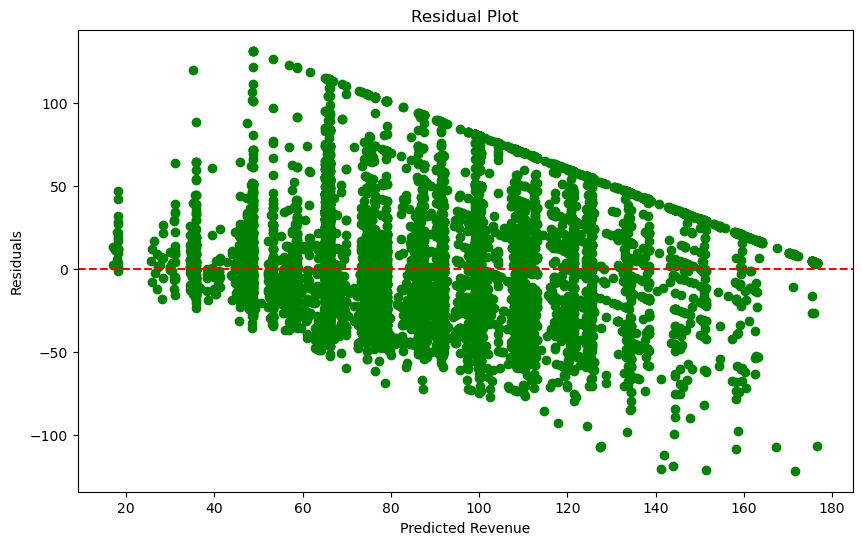

In [115]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##### Interpretation:
- After including additional features like accommodates and beds, the linear regression model shows an improved R² score of 0.45, compared to the earlier 0.18. This means the model now explains 45% of the variability in listing prices, a notable improvement but still leaves over half the variability unexplained. The Mean Absolute Error (MAE) has decreased to 24.77, suggesting the model’s average prediction deviates from actual prices by about 25 — a smaller error than before and a sign of better performance. 
- However, the residual plot still shows a pattern — a downward funnel shape — indicating heteroscedasticity, where residuals are not evenly distributed across the range of predicted values. This suggests that while adding more features has improved the model, it may still struggle to capture non-linear patterns or interactions between variables.

### $2$) Can we classify hosts as "high-performing" or "low-performing" based on their ratings and other host attributes using logistic regression?

In [118]:
print(df_capstone_cleaned_copy_2["review_scores_rating"])

0         80.0
1         85.0
2        100.0
3         97.0
4          0.0
         ...  
55444      0.0
55445    100.0
55446     95.0
55447     87.0
55448      0.0
Name: review_scores_rating, Length: 55449, dtype: float64


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score


# Selecting the features and target
df_capstone_cleaned_copy_2["host_performance"] = (df_capstone_cleaned_copy_2["review_scores_rating"] >= 90).astype("int64")

X = df_capstone_cleaned_copy_2[["host_response_rate"]]
y = df_capstone_cleaned_copy_2["host_performance"]

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=43)

# Fitting the Logistic model
model = LogisticRegression()
model.fit(X_train,y_train)

# Predicting price for a new input
y_pred = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test,y_pred)}")

roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC_AUC_Score:", roc)


Accuracy score: 0.6396753832281334
Recall score: 0.767826680313886
F1 score: 0.6925680873980612
Precision score: 0.6307455156950673
ROC_AUC_Score: 0.6515243190943342


##### Interpretation:
- The model yielded an accuracy score of 63.96%, indicating that it correctly classified hosts approximately two-thirds of the time. The recall score was 77%, suggesting that the model is effective at identifying most of the truly high-performing hosts. However, the precision score was lower at 63%, implying that a significant portion of the hosts predicted as high-performing were not actually so. The F1-score, which balances precision and recall, stood at 70%. The ROC AUC score was 65.15%, showing moderate ability to distinguish between high- and low-performing hosts.
- Overall, while the model shows reasonable performance, especially in terms of recall, there is room for improvement. Enhancing the model could involve incorporating additional features such as number of reviews, listing availability, or pricing metrics, as well as handling imbalanced classes, applying feature scaling, or trying more complex classifiers like Random Forest.

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score


# Selecting the features and target
df_capstone_cleaned_copy_2["host_performance"] = (df_capstone_cleaned_copy_2["review_scores_rating"] >= 90).astype("int64")

X = df_capstone_cleaned_copy_2[["host_response_rate","number_of_reviews"]]
y = df_capstone_cleaned_copy_2["host_performance"]

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=54)

# Fitting the Logistic model
model = LogisticRegression()
model.fit(X_train,y_train)

# Predicting price for a new input
y_pred = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test,y_pred)}")

roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC_AUC_Score:", roc)


Accuracy score: 0.6611361587015329
Recall score: 0.754128749578699
F1 score: 0.7042807680201448
Precision score: 0.6606141127841748
ROC_AUC_Score: 0.749232473944708


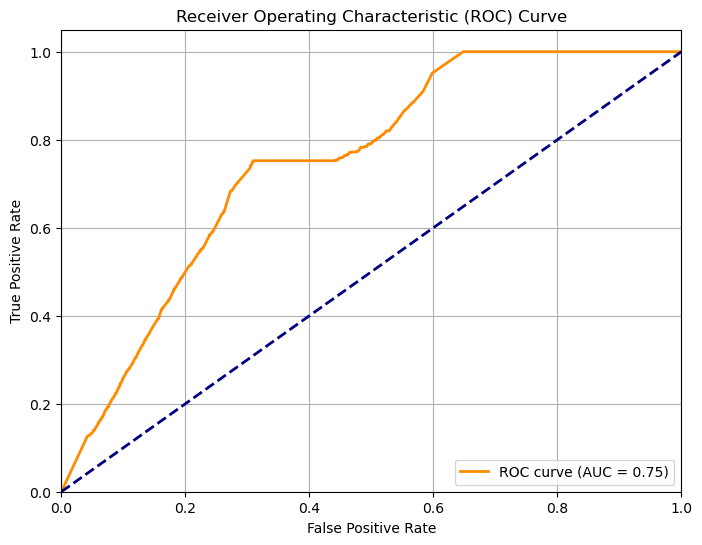

In [122]:
from sklearn.metrics import roc_curve


# Getting predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculating FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##### Interpretation:
- After incorporating additional feature like number_of_reviews, the logistic regression model shows improved classification performance. The accuracy score of 0.66 indicates that the model correctly classifies about 66% of the hosts as either high- or low-performing. The recall score of 0.75 shows that the model is good at identifying truly high-performing hosts, while the precision score of 0.66 suggests that when the model predicts a host as high-performing, it is correct about 66% of the time. The F1 score of 0.70 reflects a good balance between precision and recall. Additionally, the ROC AUC score of 0.75 indicates decent model discrimination ability between the two classes.

- Overall, these results suggest that adding meaningful host-related features improves the model’s predictive power and makes it more reliable for classifying host performance. Further gains could be achieved using non-linear models like Random Forest or XGBoost, or by adding more features like reviews_per_month, room_type, or amenities_count.

# Focus Area 2 : Geospatial and Location-Based Insights

## Objective 1: Analyse listing distribution.

### $1$) Which city has the highest number of listings?

In [127]:
# Grouping by city and counting the listings
top_cities_listings = df_capstone_cleaned_copy_2['city'].value_counts().head(10)

# Displaying top cities
print(top_cities_listings)

city
paris                       52991
berlin                        576
paris-19e-arrondissement      170
paris-15e-arrondissement      147
paris-18e-arrondissement      121
paris-20e-arrondissement      112
paris-16e-arrondissement       92
paris-11e-arrondissement       89
paris-10e-arrondissement       81
paris-17e-arrondissement       77
Name: count, dtype: int64


### $2$) What is the average review score rating by city?

city
rue de turenne paris        100.0
arrondissement              100.0
ivry sur seine              100.0
issy les moulineaux92130    100.0
paris 1er arrondissement     97.0
neuilly sur seine            96.0
collonges-sous-salève        96.0
ambilly                      96.0
paris 8è                     95.0
paris 11e arrondissement     94.0
Name: review_scores_rating, dtype: float64


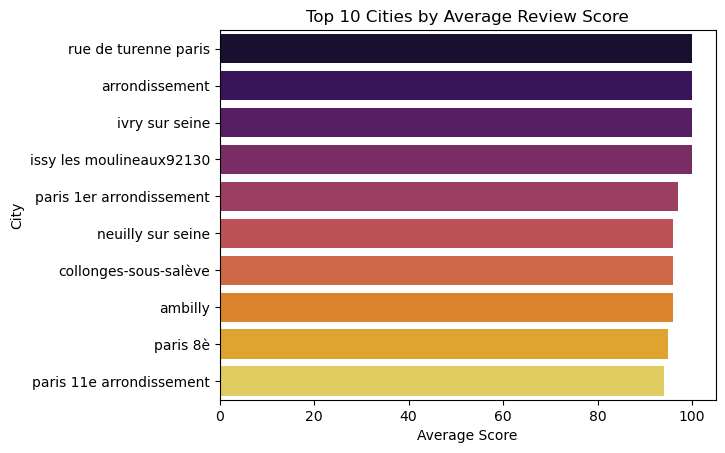

In [129]:
avg_scores_by_city = df_capstone_cleaned_copy_2.groupby('city')['review_scores_rating'].mean().sort_values(ascending=False).head(10)
print(avg_scores_by_city)

# Ploting the visual
sns.barplot(x=avg_scores_by_city.values, y=avg_scores_by_city.index, palette='inferno')
plt.title("Top 10 Cities by Average Review Score")
plt.xlabel("Average Score")
plt.ylabel("City")
plt.show()


## Objective 2: Statistical analysis of geospatial trends

### $1$) Is there a significant price difference across neighbourhoods?

In [132]:
# We will perform the two tailed z-test because the dataset > 30.
# H0: There is a significant price difference between Paris and Berlin.
# Ha: There is no significant price difference between Paris and Berlin.

from scipy.stats import norm
import numpy as np

paris_price = france_data[france_data["city"] == "paris"]["price"]
berlin_price = germany_data[germany_data["city"] == "berlin"]["price"]

# Calculating the sample means and sample standard deviation
paris_mean = paris_price.mean()
paris_std = paris_price.std()
paris_size = len(paris_price)

berlin_mean = berlin_price.mean()
berlin_std = berlin_price.std()
berlin_size = len(berlin_price)

# Calculating the z-statistics
z_statistic = (paris_mean - berlin_mean) / (np.sqrt(paris_std**2/paris_size) + (berlin_std**2/berlin_size))

# Calculating the p-value
p_value = norm.sf(abs(z_statistic))*2

print(f"P_value is: {p_value:.2f}")

# We are considering significance level as 0.05.
if p_value < 0.05:
    print("There is a significant price difference between Paris and Berlin.")
else:
    print("There is no significant price difference between Paris and Berlin.")


P_value is: 0.00
There is a significant price difference between Paris and Berlin.


### $2$) What is the probability that listings in specific areas are fully booked?

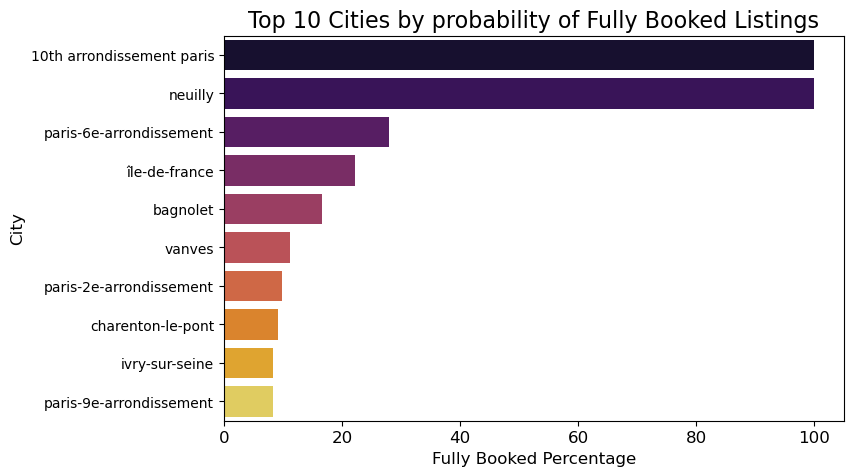

In [134]:
# Since we don't have a booking column so instead of that we are taking the reviews_per_month because those reviews were given by the guests that have booked the AirBnB previously.
df_capstone_cleaned_copy["fully_booked"] = df_capstone_cleaned_copy["reviews_per_month"] > 4

# Calculating the percentage of fully booked listings by city
probability_full_booking = df_capstone_cleaned_copy.groupby("city")["fully_booked"].mean() * 100

# Diplaying the top 10 cities in the descending order
top_10_fully_booked_cities = probability_full_booking.sort_values(ascending=False).head(10)

# Plotting the top 10 cities

plt.figure(figsize=(8,5))
sns.barplot(y = top_10_fully_booked_cities.index , x = top_10_fully_booked_cities.values, palette = "inferno")
plt.title("Top 10 Cities by probability of Fully Booked Listings", fontsize = 16)
plt.xlabel("Fully Booked Percentage",fontsize = 12)
plt.ylabel("City",fontsize = 12)
plt.xticks(fontsize = 12)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area_obj2_q2.png", dpi = 300, format = "png")
plt.show()


In [135]:
print(top_10_fully_booked_cities)

city
10th arrondissement paris    100.000000
neuilly                      100.000000
paris-6e-arrondissement       28.000000
île-de-france                 22.222222
bagnolet                      16.666667
vanves                        11.111111
paris-2e-arrondissement        9.756098
charenton-le-pont              9.090909
ivry-sur-seine                 8.333333
paris-9e-arrondissement        8.333333
Name: fully_booked, dtype: float64


##### Interpretation: 
- There is a extremely high probability of full booked listings in the 10th arrondissment of Paris, Neuilly reaching a perfect 100%. Maybe, it is an outlier or a potentially desirable location for accommodation according to the dataset.
- The remaining locations shows a significantly lower, but varying, probabilities of being full booked.

# Focus Area 3: Customer Experience and Satisfaction

## Objective 1: Identify satisfaction factors from reviews.

### $1$) What room types and areas receive the most reviews?

In [140]:
# Applying group by city wise and room type wise and taking the sum of number of reviews.
most_reviews_roomtype_city_wise = df_capstone_cleaned_copy.groupby(["city","room_type"])["number_of_reviews"].sum()

# creating a data frame with the top 10 most reviews city wise and room type wise.
top_10_most_reviews_roomtype_city_wise = most_reviews_roomtype_city_wise.sort_values(ascending = False).head(10).reset_index()
top_10_most_reviews_roomtype_city_wise.columns = ["city","room_type","number_of_reviews"]

# Printing the dataframe with the top 10 city wise and room type wise sum of reviews.
top_10_most_reviews_roomtype_city_wise

city        room_type  number_of_reviews
0                     paris  Entire home/apt             700934
1                     paris     Private room              99839
2                     paris      Shared room               8199
3                    berlin  Entire home/apt               3920
4                    berlin     Private room               2802
5  paris-15e-arrondissement  Entire home/apt                782
6   paris-4e-arrondissement  Entire home/apt                737
7  paris-18e-arrondissement  Entire home/apt                611
8   paris-2e-arrondissement  Entire home/apt                588
9  paris-11e-arrondissement  Entire home/apt                578

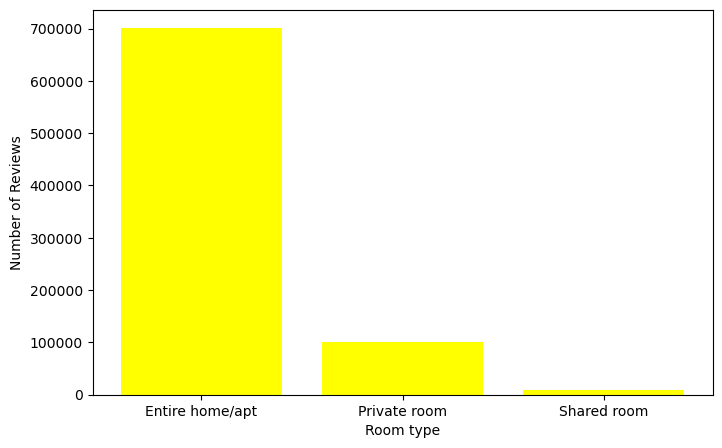

In [141]:
plt.figure(figsize=(8,5))
plt.bar(top_10_most_reviews_roomtype_city_wise["room_type"], top_10_most_reviews_roomtype_city_wise["number_of_reviews"], color = "yellow" )
plt.xlabel("Room type")
plt.ylabel("Number of Reviews")
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area3_obj1_q1.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- From the bar chart and data, it's clear that "Entire home/apt" listings receive the highest number of reviews, followed by Private rooms, and lastly Shared rooms. This indicates that guests strongly prefer entire properties over shared spaces, likely due to privacy and comfort.
- Among the top 10 city-room type combinations, Paris dominates the review volume, especially for entire apartments, suggesting it is both a high-demand location and that guests predominantly choose private accommodations there.

### $2$) How does price influence customers satisfaction based on review scores ?

- We will be calculating the correlation betwen the "price" and "review_scores_rating" column to check if they are highly correlated and if price influences customer satisfaction based on review_scores_rating.


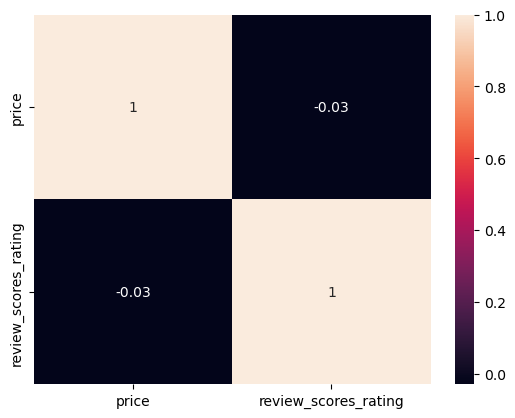

In [145]:
columns_correlation = df_capstone_cleaned_copy[["price","review_scores_rating"]]
correlation = columns_correlation.corr()
sns.heatmap(correlation, annot=True)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area3_obj1_q2.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- Based on the analysis, there is no relationship or there is a negative correlation between the price of an AirBnb and its revies scores rating.
- In general terms, a higher or lower price does not strongly predict whether an AirBnb will receive a higher or lower review scores rating.


## Objective 2: Testing statistical relationships in review patterns

### $1$) Do higher prices significantly improve review scores ?

- H0: There is no significant difference in the average review_scores_rating between listings with high price above the median or below the median.
- Ha: There is significant difference in he average review_scores_rating between listings with high price above the median or below the median.
Hypothesis test: Therefore, it is a two tailed Z-test.

In [150]:
# Calculating the median of the price column.
price_median = df_capstone_cleaned_copy["price"].median()

# Creating two dataframes with price higher than the median and lower than the median and considering only the "review_scores_rating" based on the condition.
price_higher_than_median = df_capstone_cleaned_copy[df_capstone_cleaned_copy["price"] > price_median]["review_scores_rating"]
price_lower_than_median = df_capstone_cleaned_copy[df_capstone_cleaned_copy["price"] <= price_median]["review_scores_rating"]

# Calculating the mean, standard deviation and size of the dataframes
price_higher_mean = price_higher_than_median.mean()
price_higher_std = price_higher_than_median.std()
price_higher_size = len(price_higher_than_median)

price_lower_mean = price_lower_than_median.mean()
price_lower_std = price_higher_than_median.std()
price_lower_size = len(price_lower_than_median)

# Calculating the Z-statistic value 
z_statistic_value = (price_higher_mean - price_lower_mean) / (np.sqrt(price_higher_std**2 / price_higher_size) + (price_lower_std**2 / price_lower_size))

# Calculating the P-value
p_value_new = norm.sf(abs(z_statistic_value))*2

# Calculating the z_critical value
z_critical_p = norm.ppf(1 - 0.05/2)
# Printing the p value, z statistic and z critical values 

print(f"P_value is: {p_value_new:.2f}")
print(f"Z statistic value is : {z_statistic_value:.2f}")
print(f"Z critical value is : {z_critical_p:.2f}")

# We are considering the significance level as 0.05.
if p_value_new < 0.05:
    print("There is no significant difference in the review scores rating based on price levels.")
else:
    print("There is significant difference in the review scores rating based on price levels.")


P_value is: 0.00
Z statistic value is : -5.61
Z critical value is : 1.96
There is no significant difference in the review scores rating based on price levels.


### $2$) Does the distribution of review scores rating follow normal distribution?

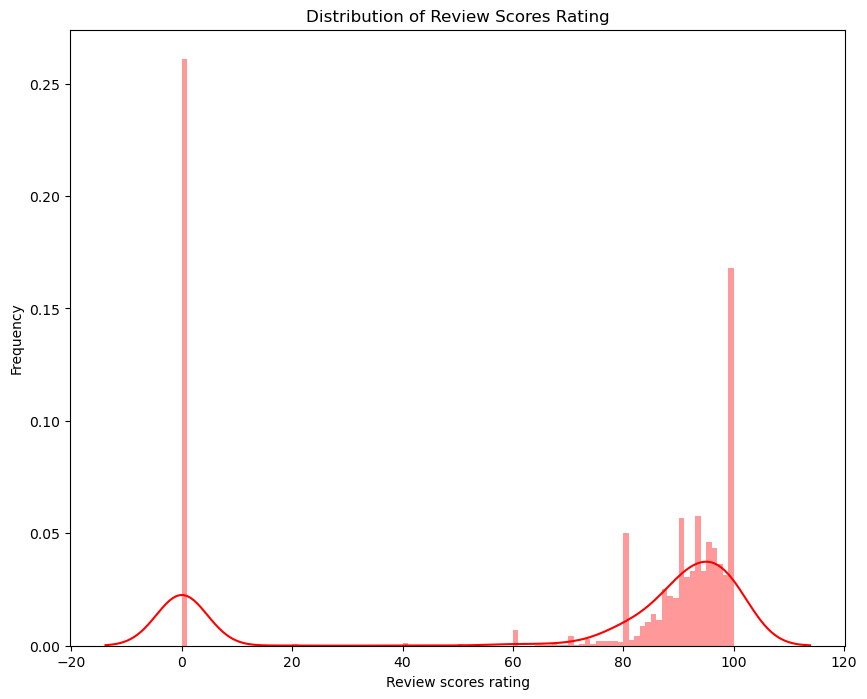

In [152]:
plt.figure(figsize=(10,8))
sns.distplot(df_capstone_cleaned_copy["review_scores_rating"], bins = 100, color="red" )
plt.title("Distribution of Review Scores Rating")
plt.xlabel("Review scores rating")
plt.ylabel("Frequency")
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area3_obj1_q2.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- Based on the plot, the distribution of "review scores rating" does not follow a normal distribution.
- A normal distribution would actually show a symmetric, bell-shaped curve centered around the mean, with most data points clustering in the middle of the plot.

# Focus Area 4: Property Attributes and Amenities Insights

## Objective 1: Understand how property features affect prices.

### $1$) Do listings with more number of amenities charge higher prices?

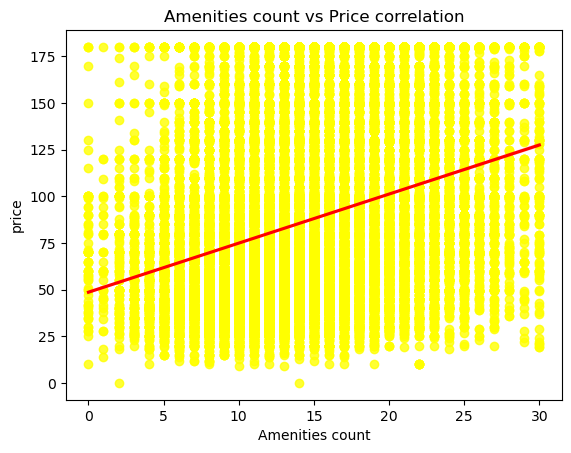

                 amenities_count     price
amenities_count         1.000000  0.315678
price                   0.315678  1.000000


In [157]:
sns.regplot(x = "amenities_count",y = "price", color = "yellow",line_kws={"color":"red"}, data = df_capstone_cleaned_copy_2)
plt.title("Amenities count vs Price correlation")
plt.xlabel("Amenities count")
plt.ylabel("price")
plt.show()

amenities_price = df_capstone_cleaned_copy_2[["amenities_count","price"]]
amenities_price_corr = amenities_price.corr()
print(amenities_price_corr)

##### Interpretation:
- There is a positive, but relatively weak correlation between the number of amenities and price.The correlation coefficient of 0.316 indicates that as the number of amenities increases , there is a tendency that price also increases.
- Many other factors may be responsible to have a stronger influence on the price of a listing.

### $2$) Which amenities based on the level (low/medium/high) are most common in top-performing listings?

In [160]:
print(df_capstone_cleaned_copy_2["amenities_level"].unique())

[0 2 1]


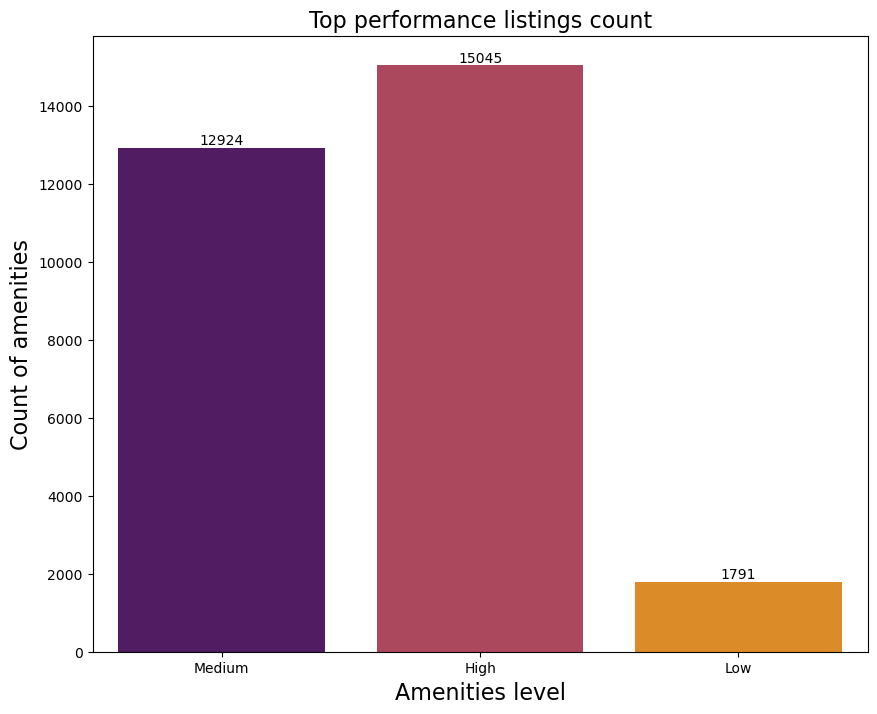

In [161]:
# defining the top performance listings based on review scores rating > 90.
df_capstone_cleaned_copy["top_performance_listing"] = (df_capstone_cleaned_copy["review_scores_rating"] >= 90).astype(int)

top_listings = df_capstone_cleaned_copy[df_capstone_cleaned_copy["top_performance_listing"] == 1]

# Countplot
plt.figure(figsize=(10,8))
ax = sns.countplot(x = "amenities_level", palette = "inferno", data = top_listings)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Top performance listings count", fontsize = 16)
plt.xlabel("Amenities level",fontsize = 16 )
plt.ylabel("Count of amenities", fontsize = 16)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area4_obj1_q2.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- Higher amenities are strongly associated with top performance. Listings offering more amenities( in this case medium and high) are much more likely to be considered top performers.
- Fewer or low amenities are less associated with top performance listings.

## Objective 2: Segment listings based on amenities

### $1$) Can we cluster prices by amenities and room type using k-means algorithm?

K: 2
Silhoutte score: 0.65
Calinski Harabasz score: 145029.15
Davies Bouldin score: 0.50
K: 3
Silhoutte score: 0.56
Calinski Harabasz score: 190818.69
Davies Bouldin score: 0.55
K: 4
Silhoutte score: 0.51
Calinski Harabasz score: 214478.78
Davies Bouldin score: 0.59


Text(0.5, 1.0, 'Elbow curve')

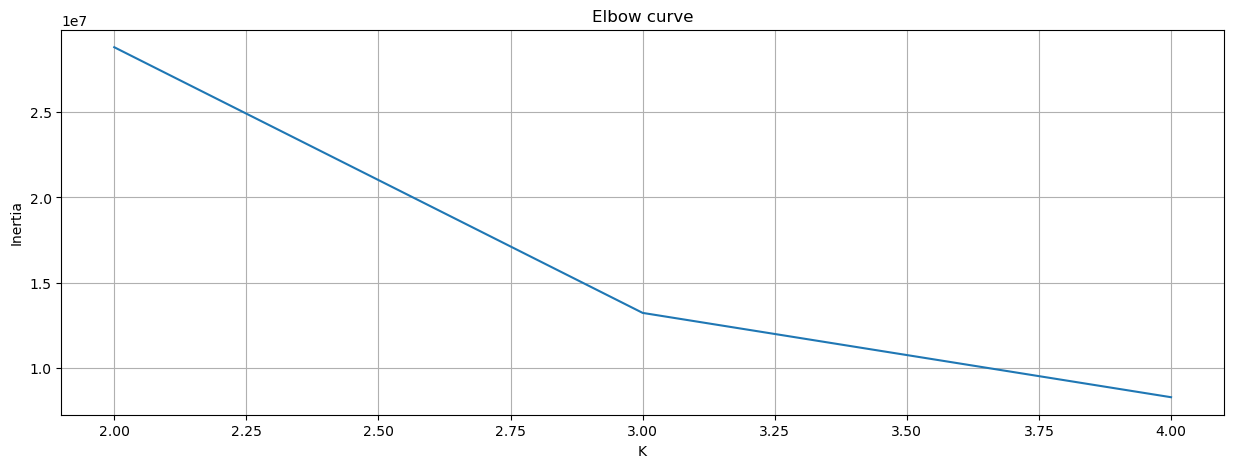

In [165]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

# creating a new dataframe with columns amenities count and room type
df_cluster_1 = df_capstone_cleaned_copy_2[["amenities_count","room_type","price"]].copy()

# Label encoding the room type column as it is a categorical column.
df_cluster_1["room_type"] = LabelEncoder().fit_transform(df_cluster_1["room_type"])

X = df_cluster_1[["amenities_count","room_type","price"]]

# Initialize inertia list for Elbow method
inertia = []

for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=45, n_init="auto")
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    # Calculating the quality based scores.
    Silhoutte_score = silhouette_score(X,labels)
    ch_score = calinski_harabasz_score(X,labels)
    dav_b_score = davies_bouldin_score(X,labels)
    inertia.append(kmeans.inertia_)

    # Printing the scores.
    print(f"K: {k}")
    print(f"Silhoutte score: {Silhoutte_score:.2f}")
    print(f"Calinski Harabasz score: {ch_score:.2f}")
    print(f"Davies Bouldin score: {dav_b_score:.2f}")

# Plotting the Elbow method for optimum K value:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 5), inertia)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow curve')


##### Interpretation:
- The metrics provide conflicting recommendations for the optimal number of clusters: Silhouette points to K=2, Calinski Harabasz to K=4, and Davies Bouldin to K=3. However, the Elbow curve clearly suggests K=3 as the point of diminishing returns for adding more clusters.
- In brief: While different metrics offer varying insights, the Elbow Method points towards K=3 as a suitable number of clusters for grouping prices by amenities count and room type. This indicates that 3 distinct groups based on these features could be identified.

### $2$) Are certain amenities clusters linked to higher review scores review scores?

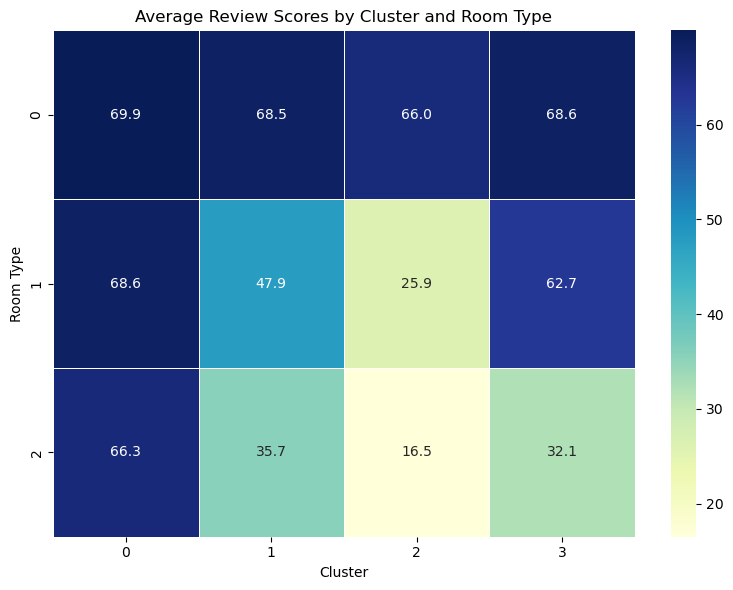

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure room_type is present
df_cluster_1['room_type'] = df_capstone_cleaned_copy_2['room_type']
df_cluster_1["cluster"] = labels
df_cluster_1["review_scores_rating"] = df_capstone_cleaned_copy_2["review_scores_rating"]
# Create heatmap data
heatmap_data = df_cluster_1.groupby(['room_type', 'cluster'])['review_scores_rating'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Average Review Scores by Cluster and Room Type")
plt.xlabel("Cluster")
plt.ylabel("Room Type")
plt.tight_layout()
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area4_obj2_q2.png", dpi = 300, format = "png")
plt.show()


##### Interpretation:
- Clusters 0 and 3 seem to represent better-performing listings, especially in the "Entire home/apt" category.
- Clusters 1 and 2 may represent lower-tier or inconsistent performers, particularly for Private and Shared rooms.

In [170]:
print(label_encoders["amenities_level"].classes_)

['High' 'Low' 'Medium']


In [171]:
print(label_encoders["room_type"].classes_)

['Entire home/apt' 'Private room' 'Shared room']


In [172]:
print(df_capstone_cleaned_copy_2["room_type"].unique())

[0 1 2]


# Focus Area 5: Host Insights and Performance

## Objective 1: Explore host activity and engagement.

### $1$) What is the average number of listings per host?

In [176]:
host_listing_count_avg = df_capstone_cleaned_copy["host_total_listings_count"].mean()
print(f"The average number of listings per host is : {host_listing_count_avg:.3f}")

The average number of listings per host is : 4.944


##### Interpretations: 
- Based on the above code, it shows that the average number of listings per host is 4.944 (≈ 5).

In [178]:
print("\u2248")

≈


### $2$) How does the host response rate affect review scores ?

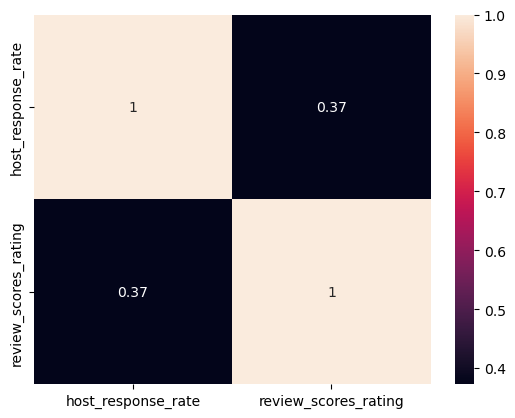

In [180]:
# For this we are finding the correlation between 'host_response_rate' and 'review_scores_rating' and plotting it using a heatmap.

corr_specified_columns = df_capstone_cleaned_copy[["host_response_rate","review_scores_rating"]]
correlation_host_response_review_scores = corr_specified_columns.corr()
sns.heatmap(correlation_host_response_review_scores, annot=True)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area5_obj1_q2.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- The positive value (0.37) indicates a positive correlation between the host response rate and review scores rating.
- A correlation value of 0.37 is usually considered moderate positive correlation. It means that as the host response rate increases , then there is a tendency that the review scores rating also increases.
- This suggests that host who respond more quickly tend to receive moderately higher review scores. It tells us that timely response by the host can positively influence guest satisfaction, which in turn increases their ratings.

## Objective 2: Predict host's performance and nature.

### $1$) Is there a relationship between host cancellation policy and guest satisfaction?

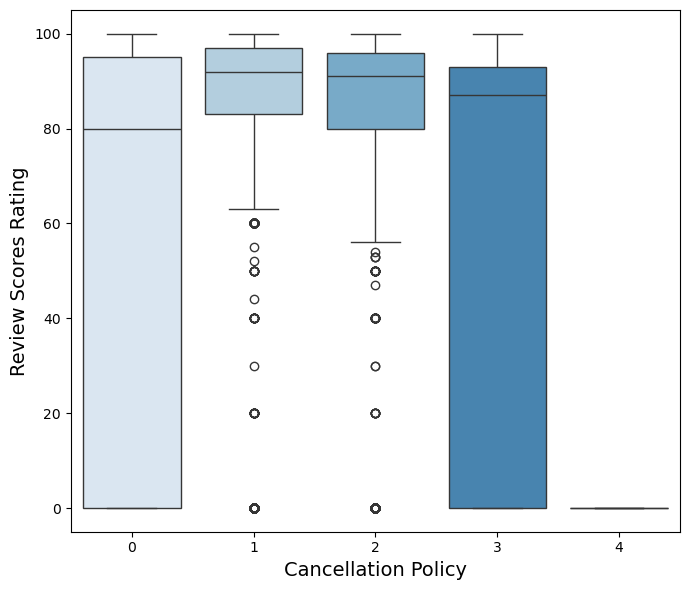

In [184]:
plt.figure(figsize=(7,6))
sns.boxplot(x = "cancellation_policy", y = "review_scores_rating", data = df_capstone_cleaned_copy_2, palette = "Blues")
plt.xlabel("Cancellation Policy", fontsize = 14)
plt.ylabel("Review Scores Rating", fontsize = 14)
plt.tight_layout()
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area5_obj2_q1.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
Here is a boxplot showing the "Review Scores Rating" against a numerical representation of "Cancellation Policy." The question is: "Is there a relationship between host cancellation policy and guest satisfaction?"

- Yes, there appears to be a strong relationship between host cancellation policy and guest satisfaction, as measured by "Review Scores Rating."
- The boxplots for cancellation policies 0, 1, 2, and 3 (likely representing "flexible," "moderate," "strict," "super_strict_30" etc., based on previous context, all show high median review scores, generally above 80, and interquartile ranges (IQR) predominantly in the higher rating spectrum (e.g., 80-100). This indicates that for these policies, guests are generally highly satisfied.
- In stark contrast, cancellation policy 4 (likely "super_strict_60" from previous context) shows an extremely low review scores rating. The boxplot for this policy is very compressed and close to zero, suggesting either very low satisfaction or possibly a lack of reviews for properties with this policy, leading to a default low score. This policy is clearly associated with significantly lower guest satisfaction compared to the others.

In [186]:
print(le.classes_)

['flexible' 'moderate' 'strict' 'super_strict_30' 'super_strict_60']


### $2$) Can we group hosts based on performance metrics using k-means clustering?

K: 2
Silhoutte score: 0.65
Calinski Harabasz score: 84047.42
Davies Bouldin score: 0.71
K: 3
Silhoutte score: 0.74
Calinski Harabasz score: 113711.02
Davies Bouldin score: 0.33
K: 4
Silhoutte score: 0.87
Calinski Harabasz score: 532331.38
Davies Bouldin score: 0.18
K: 5
Silhoutte score: 0.78
Calinski Harabasz score: 646461.29
Davies Bouldin score: 0.38
K: 6
Silhoutte score: 0.69
Calinski Harabasz score: 636801.14
Davies Bouldin score: 0.48


Text(0.5, 1.0, 'Elbow curve')

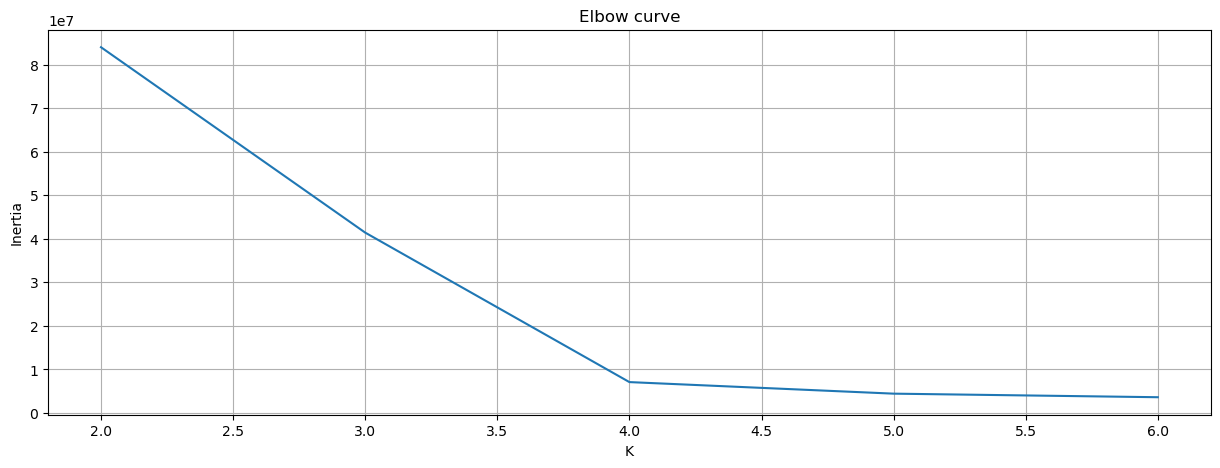

In [188]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


X_new = df_capstone_cleaned_copy_2[["host_response_rate","review_scores_rating"]]

# Initialize inertia for Elbow method
distortions = []

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=46, n_init="auto")
    labels = kmeans.fit_predict(X_new)

    # Calculating the quality based scores.
    Silhoutte_score = silhouette_score(X_new,labels)
    ch_score = calinski_harabasz_score(X_new,labels)
    dav_b_score = davies_bouldin_score(X_new,labels)
    distortions.append(kmeans.inertia_)

    # Printing the scores.
    print(f"K: {k}")
    print(f"Silhoutte score: {Silhoutte_score:.2f}")
    print(f"Calinski Harabasz score: {ch_score:.2f}")
    print(f"Davies Bouldin score: {dav_b_score:.2f}")

# Plotting the Elbow method for optimum K value:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 7), distortions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow curve')

##### Interpretation:
Considering all metrics and the Elbow curve:

- The Elbow curve strongly suggests K=4 as a good cluster value for the number of clusters.

- The Davies Bouldin score also indicates K=4 or K=5 as optimal.

- The Calinski Harabasz score points towards K=5.

- The Silhouette score shows good values for K=3 and K=5.

- While there's some slight variation, K=4 or K=5 appear to be the most consistent choices for grouping hosts based on their performance metrics using K-means clustering. The elbow curve provides a strong visual clue for K=4, which is also supported by the Davies Bouldin score. If forced to pick one value, K=4 would be a reasonable choice given the clear elbow and good performance on other metrics. 

# Focus Area 6: Cancellation and Security Policies

## Objective 1: Understand the impact of cancellation policies.

### $1$) Which cancellation policies are most common?

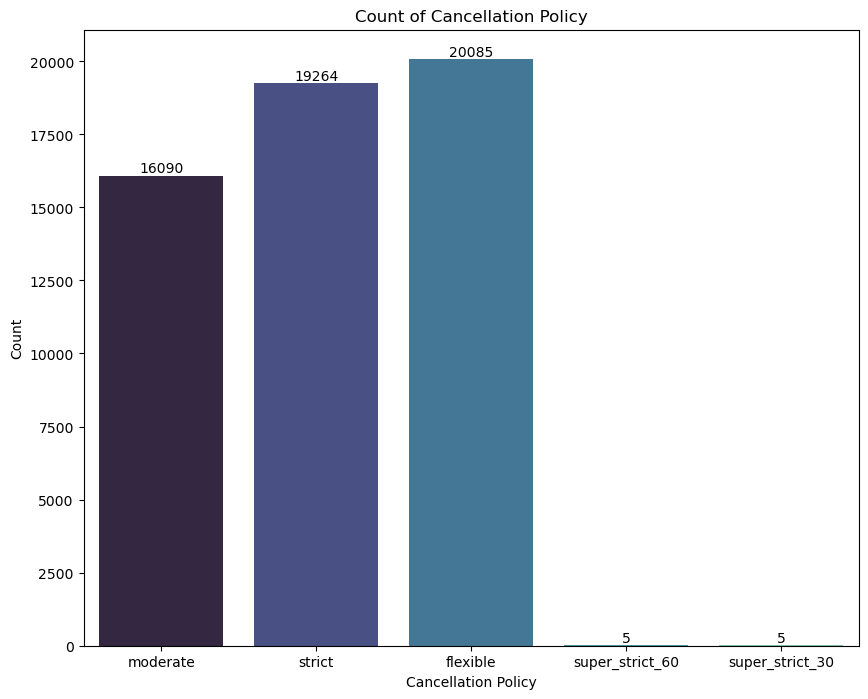

In [193]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = df_capstone_cleaned_copy["cancellation_policy"], palette = "mako")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title("Count of Cancellation Policy")
plt.xlabel("Cancellation Policy")
plt.ylabel("Count")
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area6_obj1_q1.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- "Flexible" cancellation policy: It is the most common with a count of 20,085 occurences. This suggests that a significant majority of bookings or offerings adhere to a flexible cancellation policy.
- "Strict" cancellation policy: It is the second most common with a count of 19,264 occurences. This indicates that while flexible is preferred, a substantial portion of the policies are still strict.
- "Moderate" cancellation policy: Is is less common than the "flexible" and "strict" with a count of 16,090 occurences.
- "Super Strict" cancellation policy: These cancellation policies have very less count, with only 5 occurences each. This suggests that these policies are very rarely applied or offered.

### $2$) Do cancellation policies impact review scores?

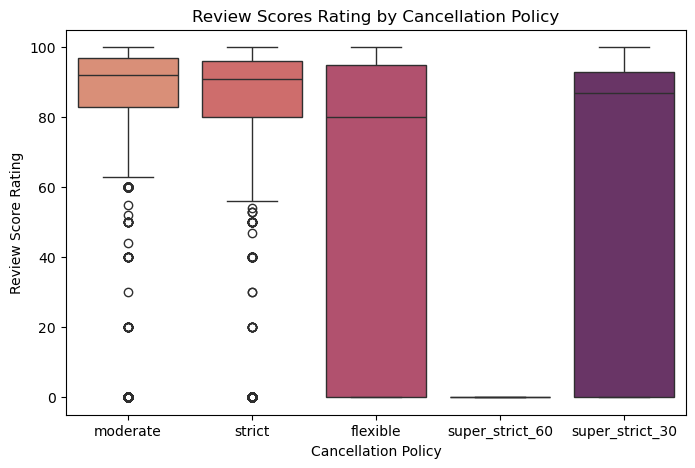

In [196]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "cancellation_policy", y = "review_scores_rating", palette = "flare", data = df_capstone_cleaned_copy)
plt.title("Review Scores Rating by Cancellation Policy")
plt.xlabel("Cancellation Policy")
plt.ylabel("Review Score Rating")
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area6_obj1_q2.png", dpi = 300, format = "png")
plt.show()

In [197]:
review_scores_avg_policy_wise = df_capstone_cleaned_copy.groupby("cancellation_policy")["review_scores_rating"].median()
print(review_scores_avg_policy_wise)

cancellation_policy
flexible           80.0
moderate           92.0
strict             91.0
super_strict_30    87.0
super_strict_60     0.0
Name: review_scores_rating, dtype: float64


##### Interpretation:
- "super_strict_60" cancellation policy stands out with an extremely low (or zero) review score rating, as indicated by the very short boxplot and a median of 0.0. This suggests that properties with this policy consistently receive very poor or no review scores.
- The other policies ("moderate", "strict", "flexible", "super_strict_30") generally have high review scores, with medians ranging from 80.0 to 92.0.
- "Strict" policy has the highest median review score at 91.0."Super_strict_30" also shows a high median of 87.0.
- "Flexible" and "moderate" policies have slightly lower, but still high, median scores of 92.0 and 80.0 respectively.

## Objective 2: Evaluate booking security aspects

### $1$) Do listings with high security deposits have fewer cancellations?

H0: Listings with high security deposits have fewer cancellations.

Ha: Listings with high security deposits do not have fewer cancellations.

In [202]:
# Creating a dataframe "deposited" where security deposit > mean.
df_capstone_cleaned_copy["deposited"] = df_capstone_cleaned_copy["security_deposit"] > df_capstone_cleaned_copy["security_deposit"].mean()

# Creating two dataframes namely "has_deposited" and "not_deposited"
has_deposited = df_capstone_cleaned_copy[df_capstone_cleaned_copy["deposited"] == True]["number_of_reviews"]
not_deposited = df_capstone_cleaned_copy[df_capstone_cleaned_copy["deposited"] == False]["number_of_reviews"]

# Calculating the mean, standard deviation and size of the dataframes
has_deposited_mean = has_deposited.mean()
has_deposited_std = has_deposited.std()
has_deposited_size = len(has_deposited)

not_deposited_mean = not_deposited.mean()
not_deposited_std = not_deposited.std()
not_deposited_size = len(not_deposited)

# Calculating the Z-statistic value 
z_statistic_value_1 = (has_deposited_mean - not_deposited_mean) / (np.sqrt(has_deposited_std**2 / has_deposited_size) + (not_deposited_std**2 / not_deposited_size))

# Calculating the P-value
p_value_new_1 = norm.sf(abs(z_statistic_value))*2

#
z_critical_new = norm.ppf(abs(1 - 0.05/2))

# Printing the p value and the z statistic values 

print(f"P_value is: {p_value_new_1:.2f}")

# We are considering the significance level as 0.05.
if p_value_new_1 < 0.05:
    print("There is significant difference in listings with higher or lower than the mean value of review scores rating (bookings).")
else:
    print("There is no significant difference in the listings with higher or lower than the mean value of review scores rating (bookings).")


P_value is: 0.00
There is significant difference in listings with higher or lower than the mean value of review scores rating (bookings).


### $2$) Is there a correlation between security features and listing price ?


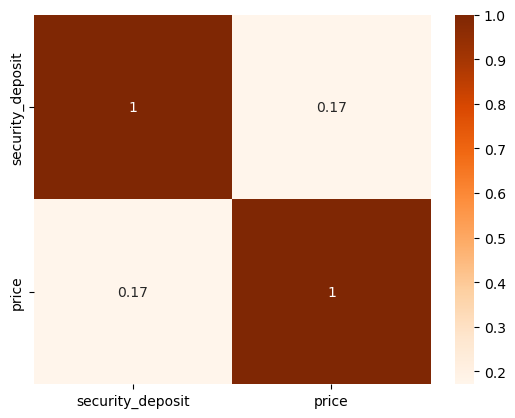

In [204]:
columns_security_price = df_capstone_cleaned_copy[["security_deposit","price"]]
correlation_s_p = columns_security_price.corr()
sns.heatmap(correlation_s_p, cmap="Oranges", annot = True)
plt.savefig("C:\\Users\\hbhan\\Machine Learning\\Visuals\\focus_area6_obj2_q2.png", dpi = 300, format = "png")
plt.show()

##### Interpretation:
- A correlation coefficient of 0.17 indicates a weak positive linear correlation between "security_deposit" and "price".
- It means as the security deposit increases , price also tends to increase and vice-versa.
- Therefore, we can say that there is a linear relationship among both but not a strong one.

### I have exported the df_capstone_cleaned dataset to MySQL in order to perform the Focus Area 7.

# Focus Area 7: Airbnb Data Exploration using MySQL

In [208]:
import pandas as pd
import mysql.connector

# Load CSV file
csv_path = "C:/Users/hbhan/Machine Learning/df_capstone_cleaned.csv"
df = pd.read_csv(csv_path)

# Replace NaN with None for MySQL
df = df.where(pd.notnull(df), None)

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="niit#123", 
    database="topsecret"
)
cursor = conn.cursor()

# Define SQL types based on pandas dtypes
dtype_map = {
    'int64': 'INT',
    'float64': 'FLOAT',
    'object': 'VARCHAR(255)',  
    'bool': 'BOOLEAN'
}

# Drop table if exists
cursor.execute("DROP TABLE IF EXISTS df_cleaned")

# Create table
cols = []
for col in df.columns:
    col_type = dtype_map[str(df[col].dtype)]
    col = col.replace(" ", "_")  
    cols.append(f"`{col}` {col_type}")
create_table_sql = f"CREATE TABLE df_cleaned ({', '.join(cols)})"
cursor.execute(create_table_sql)

# Insert data
placeholders = ', '.join(['%s'] * len(df.columns))
insert_sql = f"INSERT INTO df_cleaned VALUES ({placeholders})"

for row in df.itertuples(index=False, name=None):
    cursor.execute(insert_sql, row)

conn.commit()
cursor.close()
conn.close()

print("Table created and data inserted successfully.")


Table created and data inserted successfully.


I completed Focus Area 7 by writing and executing SQL queries in MySQL Workbench:
- Objective 1: to analyze listings and host activity across locations.
- Objective 2: Automate tasks using Stored Procedure.

# France and Germany Listings Overview Dashboard

I completed Focus Area 8 by creating three interactive dashboards in Tableau:
- To analyze the price trends, number of reviews vs time , room type share , and also the KPI for both the countries namely France and Germany.
- I have also created a summary dashboard comprising of the listings information of both the countries.

# Business Suggestions:

### Pricing Strategy Optimization:
- Implement a dynamic pricing system based on location, room type, and historical demand trends.
- Encourage hosts to use data-backed pricing models for competitive advantage.

### Property Improvements and Host Developments:
- Guide hosts using insights from top-performing listings considering factors like number of amenities, host response rate, etc.
- Promote enhancements like cleanliness standards, flexible cancellation policies.
                          
### Location-Based Strategy:
- Use city-level trends (e.g. Paris and Berlin with high listings density and pricing) to target new property onboarding.
- Identify underperforming cities for promotions or host training to improve the revenue.

### Customer Segmentation:
- Use clustering insights to segment listings by price, room type, and rating.
- Customize marketing for budget, mid-range, and luxury travellers.
                                                                                                                                   
                                                                                                                                   

# Summary

- The dataset consists of France and Germany Airbnb listings, concatenated and cleaned into a unified file namely "df_capstone_cleaned" with 55499 records.
- Room Type Distribution:
  * Entire home/apt is the most common and with the highest prices.
  * Private rooms offer lower prices and higher occupancy in certain regions.
- City Trends:
  * Paris and Berlin dominate in listings count and price variability.
  * Smaller cities show more stable, predictable pricing behavior.
- Best Performing Hosts:
  * Best performing hosts earn more and are able to attract better review scores.
- Modelling Insights:
  * Regression models identify price influencers such as city, room type, review scores rating.
- Cleaning fee, Security Deposit, and Amenities significantly influence listing categories and price brackets.

# Conclusion

The Airbnb capstone project provides critical insights into listing performance, customer preferences, pricing patterns, and regional dynamics.
There findings support decision-making for hosts, platfoRm provider, and regional marketing firms.


### Key Insights:
- Listngs Distribution: 55499 lisings across France and Germany, with Paris and Berlin leading.
- Pricing Drivers: Room type, city, host response rate are key predictors.
- Customer Behavior: More amenities increase listing desirability.
- Regional Difference in Price: Paris shows high price dispersion, while Berlin's listings are more standardized.
- Machine learning and clustering models help segment listings for optimized user targeting.